# Global Power Plant Database Project

In [4]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

In [5]:
df = pd.read_csv(r"C:\Users\mahes\Downloads\database_IND.csv")

In [6]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

The dataset has 907 rows and 27 columns


In [8]:
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

# Exploratory Data Analysis

In [9]:
df.shape

(907, 27)

we have 907 rows and 27 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

It's evident that our data contains null values and object datatypes. We'll address these separately using imputation and encoding methods.

In [11]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

It can be clearly seen that we have high number of null values in the datasets.

In [13]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In this dataset, the columns 'country', 'country_long', 'other_fuel2', 'year_of_capacity_data', and 'generation_data_source' all contain a single unique value. Additionally, the columns 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', and 'estimated_generation_gwh' don't have any unique values, indicating that they are populated solely with NAN values. Given that these columns have identical entries across the dataset, we can safely remove them.

# Feature Selection

country, country_long, other_fuel2, year_of_capacity_data and generation_data_source

other_fuel3, wepp_id,generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh

In [14]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

We see that only IND is listed in the country hence there is no impact of this feature on prediction

In [15]:
# Checking the count of the country_long
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

We see that only India is listed in the country_long hence there is no impact of this feature on prediction

In [16]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [17]:
# Checking the count of other_fuel2
df["other_fuel2"].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

We see that only Oil is listed in the other_fuel2 and rest are all 906 null values hence there is no impact of this feature on prediction

In [18]:
# Checking the count of year_of_capacity_data
df["year_of_capacity_data"].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

year_of_capacity_data has only 2019 listed value and 388 null values hence there is no impact of this feature on prediction

In [19]:
# Checking the count of generation_data_source
df["generation_data_source"].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

 generation_data_source has only Central Electricity Authority as listed value and 458 null values hence there is no impact of this feature on prediction

In [20]:
# Checking the count of other_fuel3
df["other_fuel3"].value_counts()

Series([], Name: other_fuel3, dtype: int64)

other_fuel3 has all values as null values hence dropping this column

In [21]:
# Checking the count of wepp_id
df["wepp_id"].value_counts()

Series([], Name: wepp_id, dtype: int64)

wepp_id has all values as null values hence dropping this column

In [22]:
# Checking the count of generation_gwh_2013
df["generation_gwh_2013"].value_counts()

Series([], Name: generation_gwh_2013, dtype: int64)

generation_gwh_2013 has all values as null values hence dropping this column

In [23]:
# Checking the count of generation_gwh_2019
df["generation_gwh_2019"].value_counts()

Series([], Name: generation_gwh_2019, dtype: int64)

generation_gwh_2019 has all values as null values hence dropping this column

In [24]:
# Checking the count of generation_gwh_2019
df["estimated_generation_gwh"].value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

estimated_generation_gwh has all values as null values hence dropping this column

In [25]:
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)

In [26]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'Fuel_Type', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [28]:
df["name"].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [29]:
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [30]:
df["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [31]:
# Checking the count of url
df["url"].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

The columns "name", "gppd_idnr", "owner", "url" are all unique values and there is no impact of this feature on prediction hence we can drop these features

In [32]:
df.drop(columns=["name","gppd_idnr","owner","url"],axis=1,inplace=True)

In [33]:
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [34]:
df.shape

(907, 13)

In [35]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

# Heatmap

<AxesSubplot:>

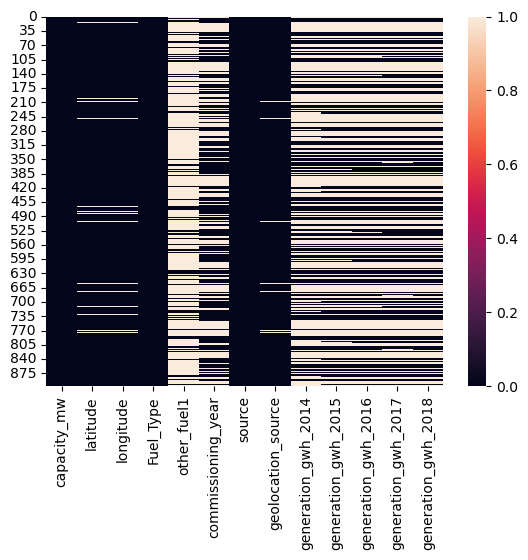

In [36]:
sns.heatmap(df.isnull())

We can clearly observe the white lines in the heat map which indicates the missing values in the dataset.

# Checking the skewness of the dataset

In [37]:
df.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

In [38]:
df["other_fuel1"].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

## Addressing null values through the application of imputation methods.

#### Checking the mean and mode values of the features having null values, so that we can fill the null values

In [39]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [40]:
df['latitude'].mean()

21.19791811846691

In [41]:
df["other_fuel1"].mode()

0    Oil
Name: other_fuel1, dtype: object

In [42]:
df["geolocation_source"].mode()

0    WRI
Name: geolocation_source, dtype: object

#### Filling the null values

In [43]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

# Checking for missing values after imputation.

In [44]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Thus, we have addressed the null values, and the dataset now appears to be free of any null entries.

<AxesSubplot:>

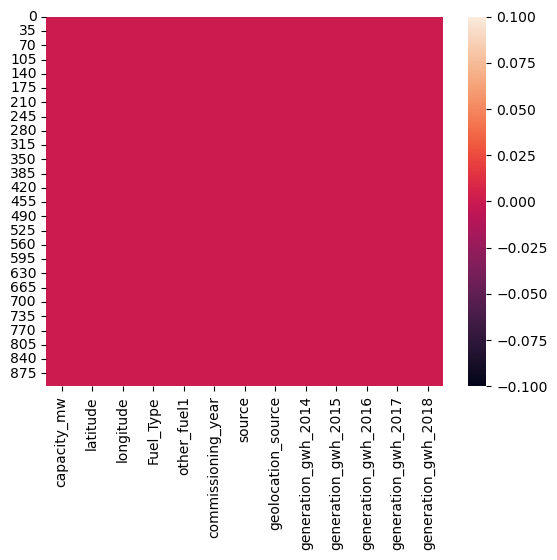

In [45]:
sns.heatmap(df.isnull())

Clearly there are no null values

In [46]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [47]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [48]:
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

In [49]:
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

## Feature Extraction

In [50]:
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [51]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

I've derived the age of the power plants from the commissioning year and subsequently removed the commissioning year columns. This allows us to determine the age of the power plants.

In [52]:
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


## Statistical Summary

In [53]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


Here we can see the statistical analysis of the dataset (numerical only)

It's clear that all columns have an equal count, indicating a balanced dataset. The power plant's capacity ranges from zero to 4760, with a significant disparity between the mean and standard deviation. The large gap between the maximum value and the 75th percentile suggests the presence of substantial outliers in most columns. We'll employ suitable techniques to eliminate these outliers prior to model construction.

In [54]:
cat_col = [i for i in df.dtypes.index if df.dtypes[i] == 'object']
print(cat_col)


['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [55]:
num_col = [i for i in df.dtypes.index if df.dtypes[i] != 'object']
print(num_col)
 

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Data Visualization

In [56]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

## Univariate Analysis

### Categorical column visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


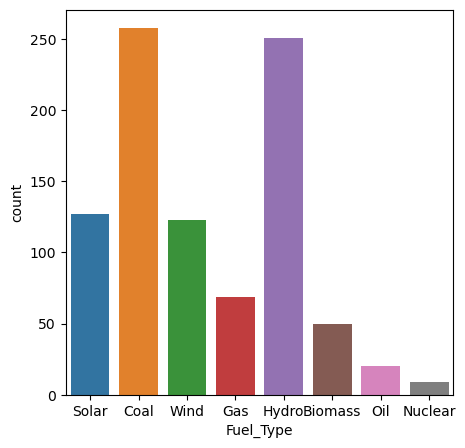

In [57]:
print(df['Fuel_Type'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['Fuel_Type'])
plt.show()

The count plot for the "primary_fuel" column reveals that coal and hydro fuel types constitute the majority of the values, followed by solar and wind. Gas, biomass, oil, and nuclear, on the other hand, have significantly fewer data counts.

When we use "primary_fuel" as our target label for a classification model, this distribution could lead to a class imbalance problem. This will need to be addressed appropriately to ensure a robust model.


Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


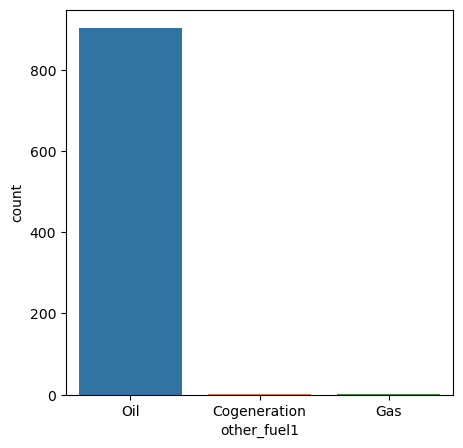

In [58]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

From the data, we can see that the 'other_fuel1' category comprises three distinct types: 'Oil', 'Cogeneration other fuel', and 'Gas'. It's evident that oil is the most commonly used fuel type among these.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


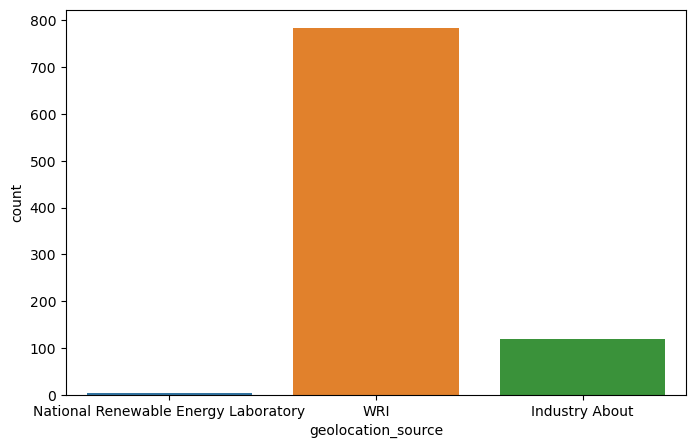

In [59]:
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()

Here it can be seen that the count of WRI is the max, which means that the max information is shared by this source.

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


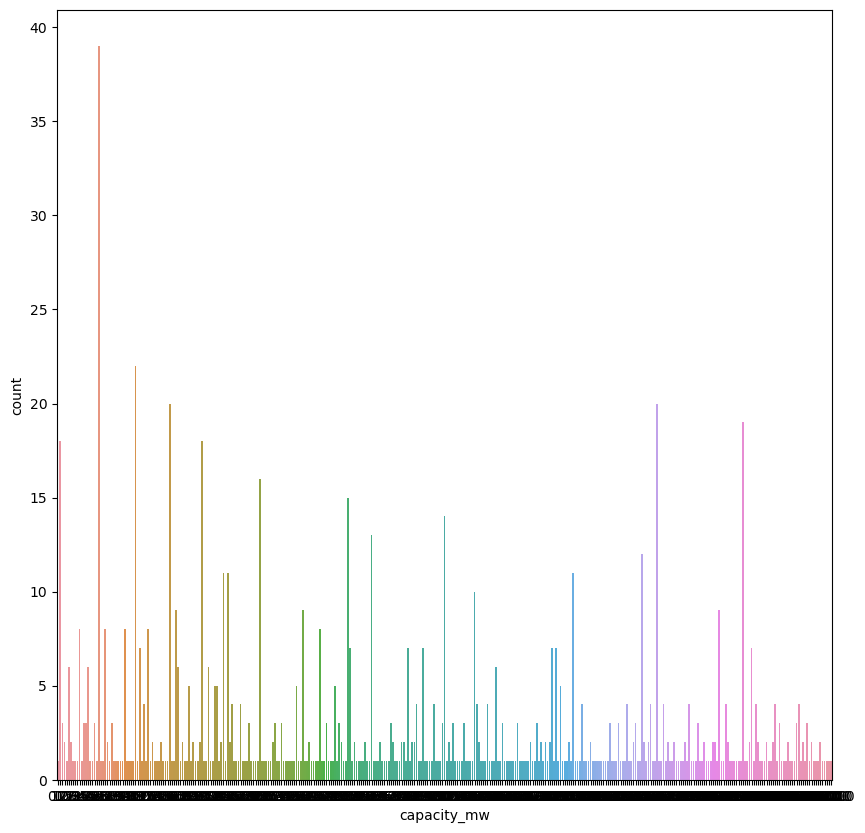

In [60]:
print(df['capacity_mw'].value_counts())   
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

Here it can be seen the counts withrespect to capacity_mw.

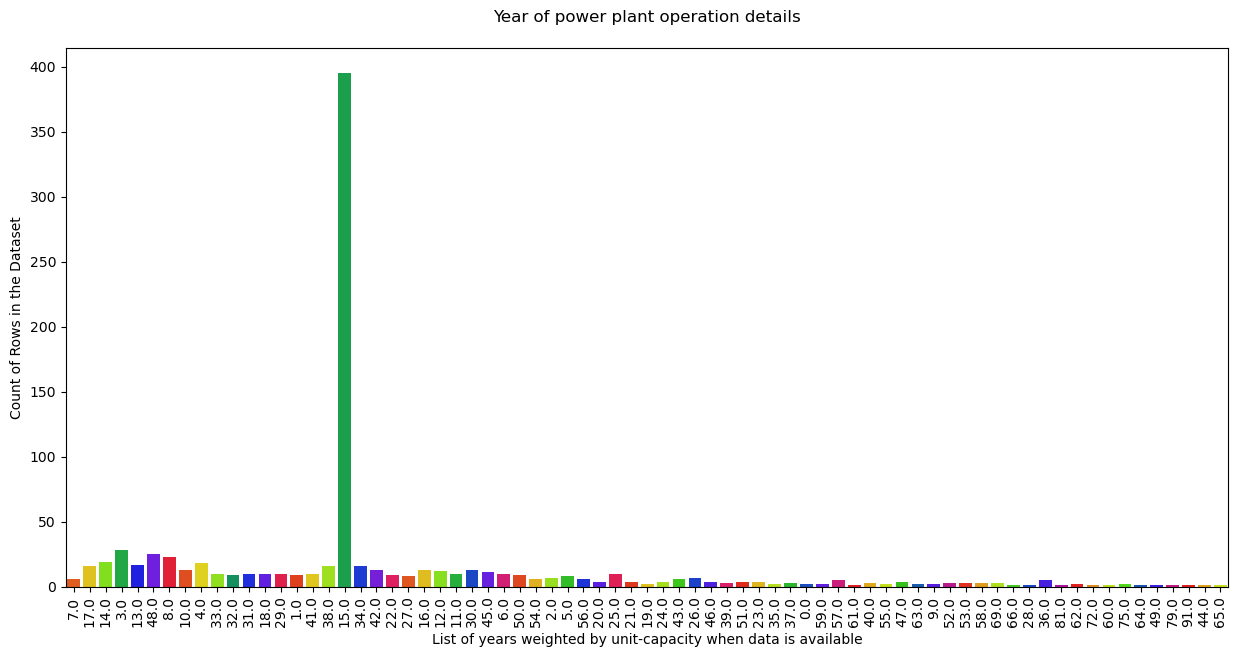

In [61]:
plt.figure(figsize=(15,7))
values = list(df['Power_plant_age'].unique())
diag = sns.countplot(df["Power_plant_age"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

The count plot shows the distribution of years when the power plant data was recorded. We dealt with missing values in the "commissioning_year" column by substituting them with the median value. As a result, the year "15" appears most frequently in our dataset.

### Checking the Distribution of the Dataset, if it is normal

Numerical Column

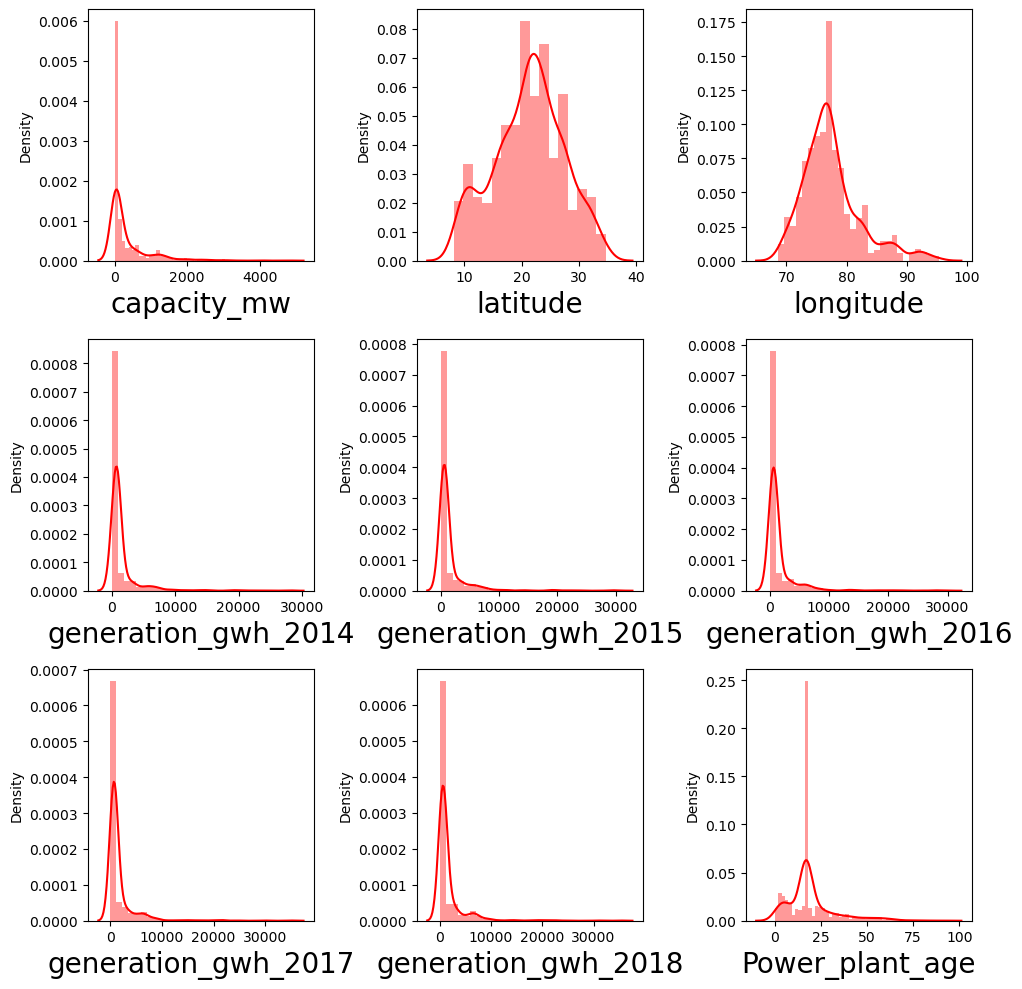

In [63]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The plots indicate that the data does not follow a normal distribution. There are noticeable outliers and skewness, which require appropriate treatment.

## Bivariate Analysis

### Correlation between features and target 'Capacity_mw'

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

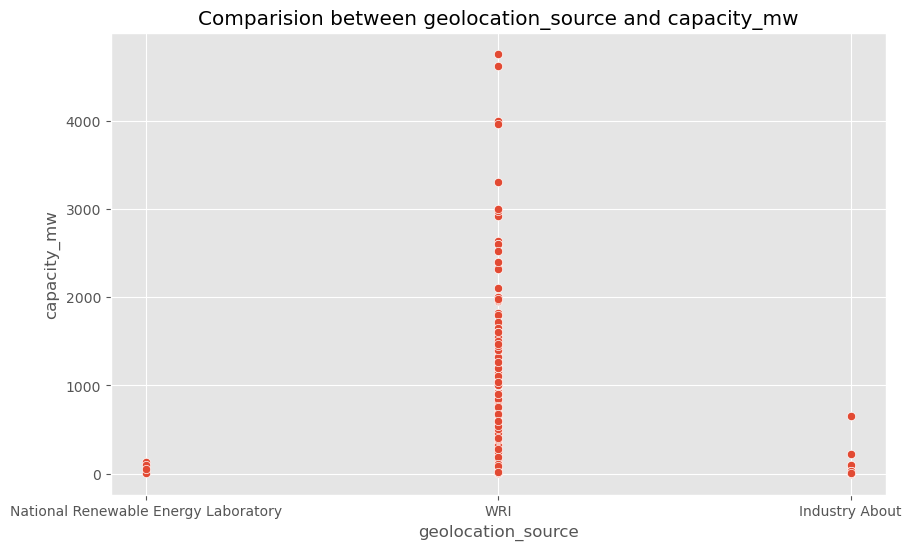

In [64]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"])

Here also we can see that WRI 'geolocation_source' plays a major role

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

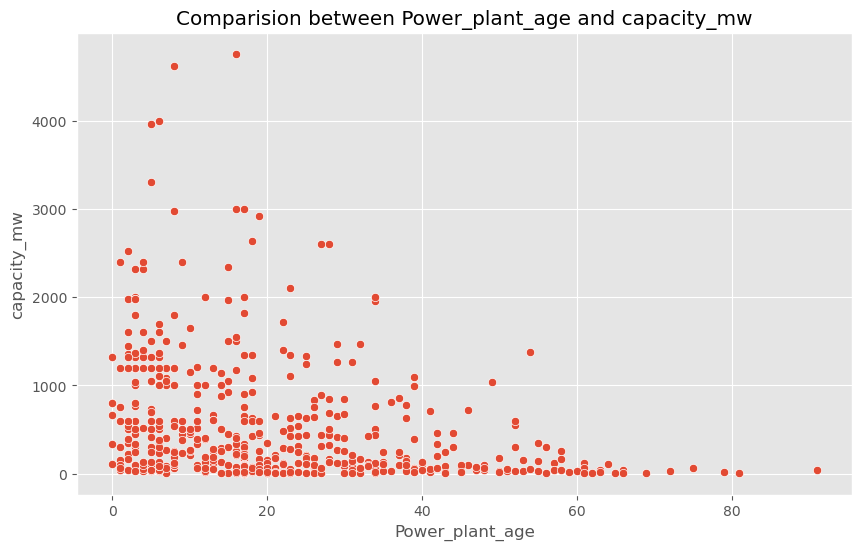

In [65]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"])

Here we can see a negative correlation

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

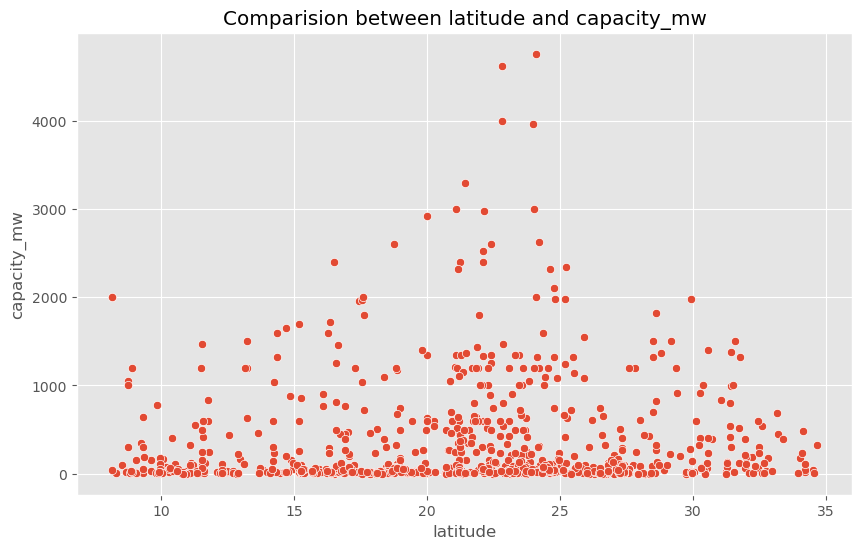

In [66]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"])

Here this feature does not show any linear relationship

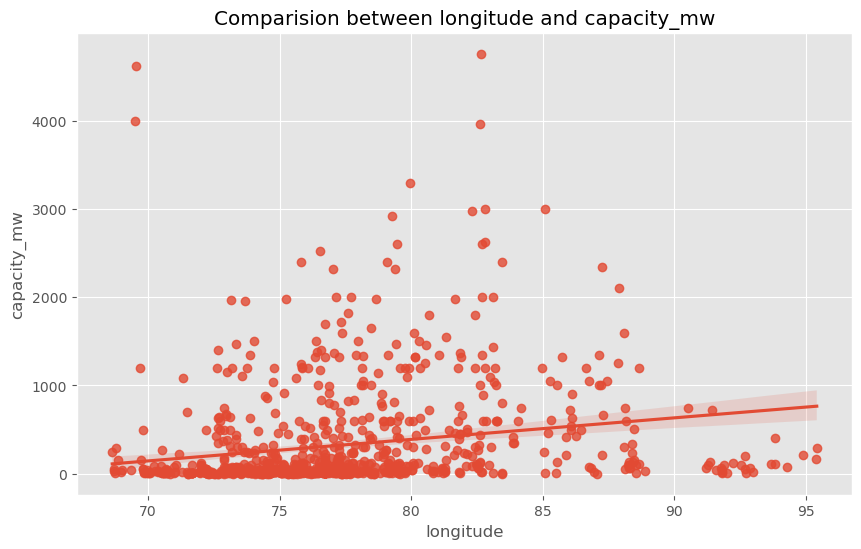

In [67]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

This feature also does not show any linear relationship

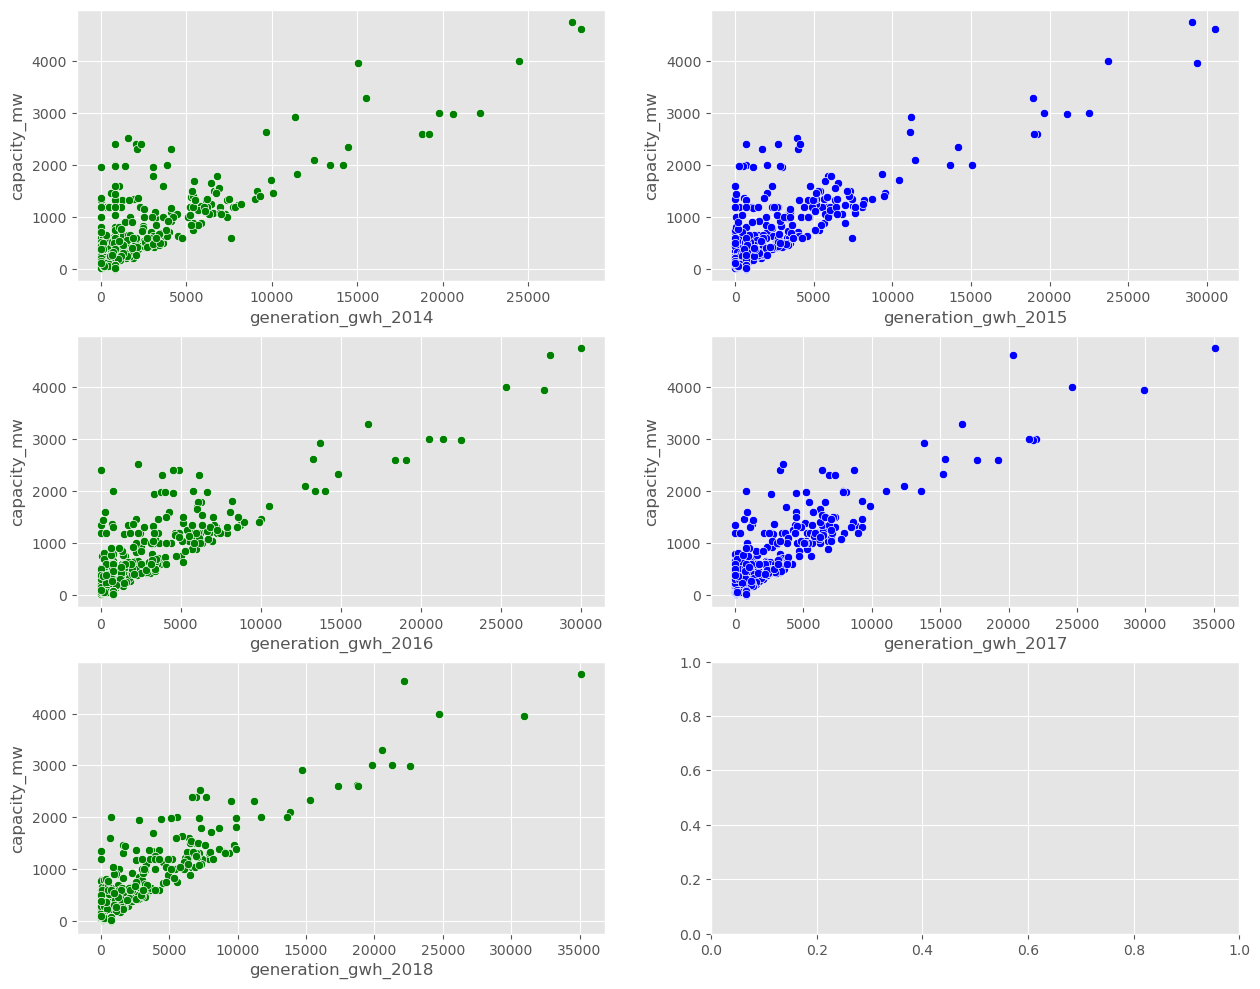

In [69]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",ax=axes[0,0],data = df,color="g")

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[2,0],data=df,color="g")
plt.show()

This features shows a positive correlation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

### Correlation between features and target 'Fuel_Types'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

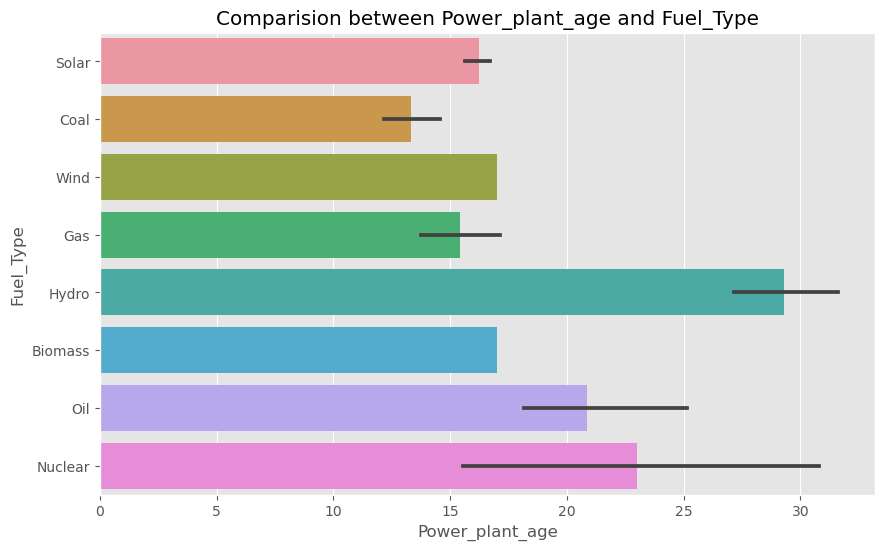

In [70]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(df['Power_plant_age'],df["Fuel_Type"])

Here we can see that older power plants uses Hydro as energy source, followed by oil. The newer power plants are using more of Coal, Solar and Gas

<AxesSubplot:title={'center':'Comparision between latitude and Fuel_Type'}, xlabel='latitude', ylabel='Fuel_Type'>

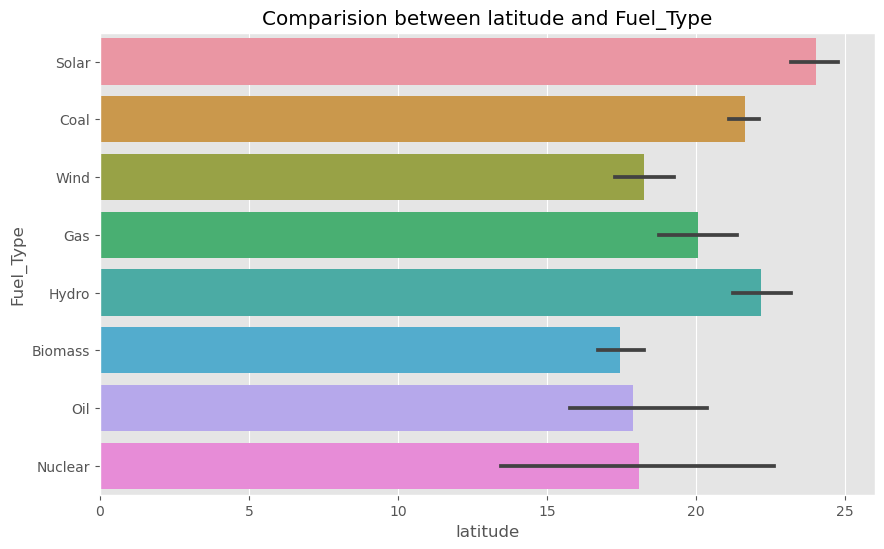

In [71]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['latitude'],df["Fuel_Type"])

Solar has the highest latitude

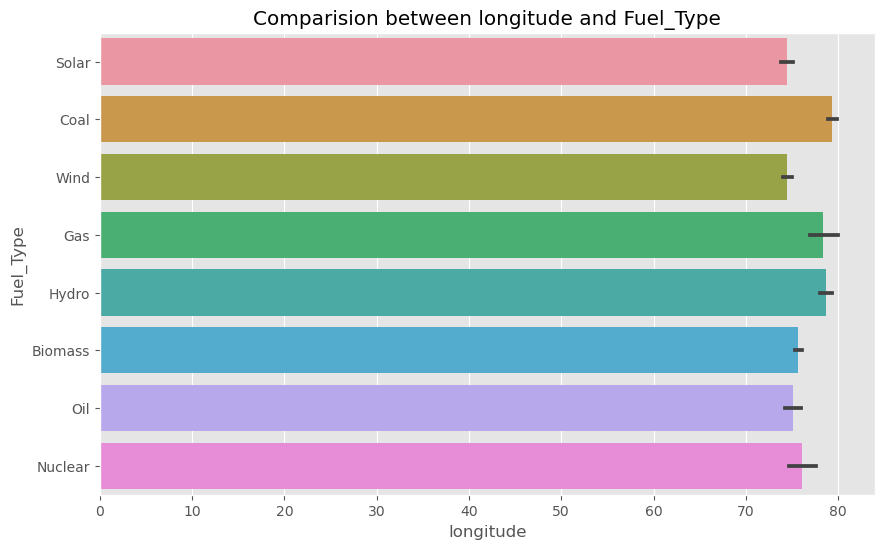

In [72]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(df['longitude'],df["Fuel_Type"]);

Here Gas shows the highest longitude

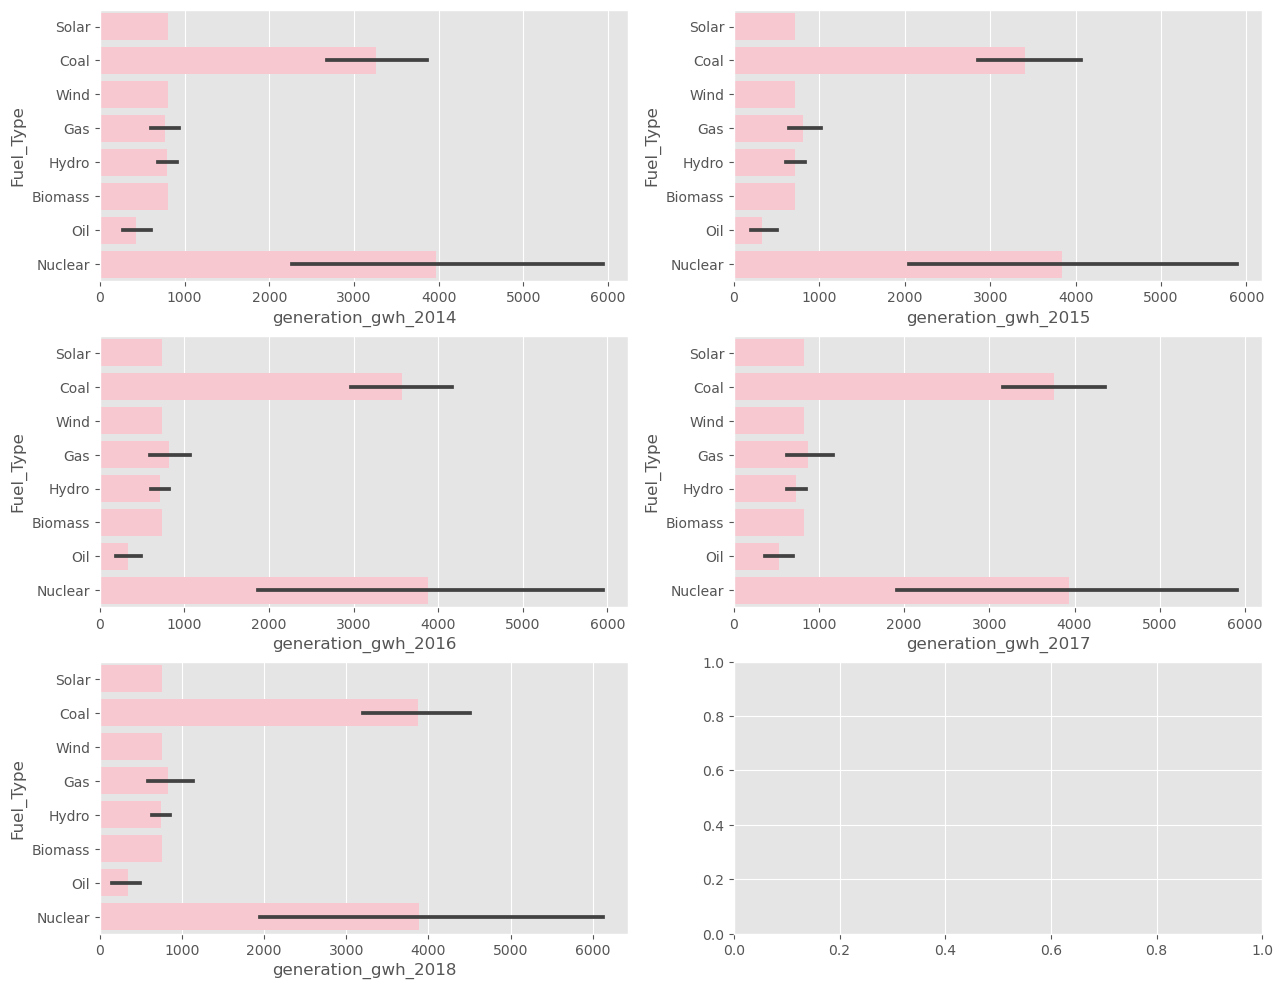

In [75]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2013 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2014", y = "Fuel_Type",ax=axes[0,0],data = df,color="pink")

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[0,1],data=df,color="pink")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,0],data=df,color="pink")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[1,1],data=df,color="pink")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2018',y='Fuel_Type',ax=axes[2,0],data=df,color="pink")
plt.show()

Here we can see that the most used energy source in all the years is nuclear followed by coal

### Checking the relationship between both the targets

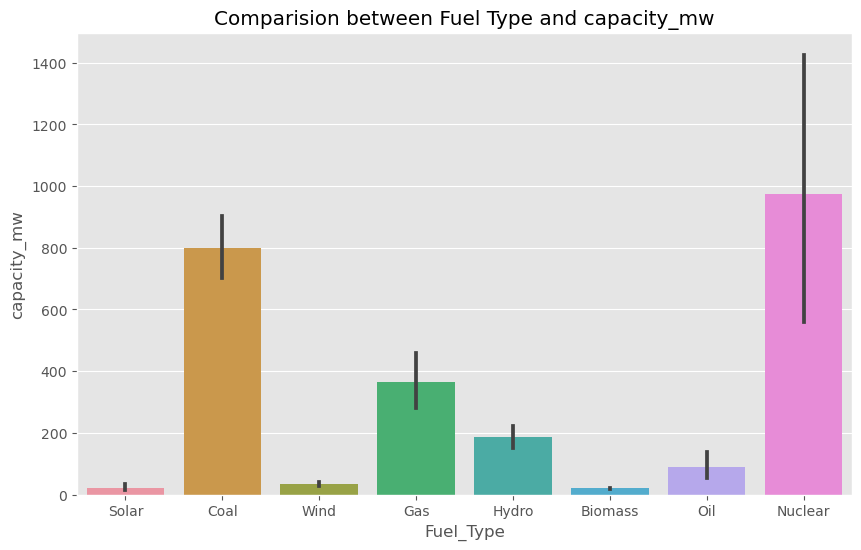

In [76]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

Here also it shows that energy source Nuclear has the major contribution

## Label Encoding

In [77]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [78]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [79]:
df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


Now we have encoded the categorical columns

In [80]:
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


## Identifying the outliers

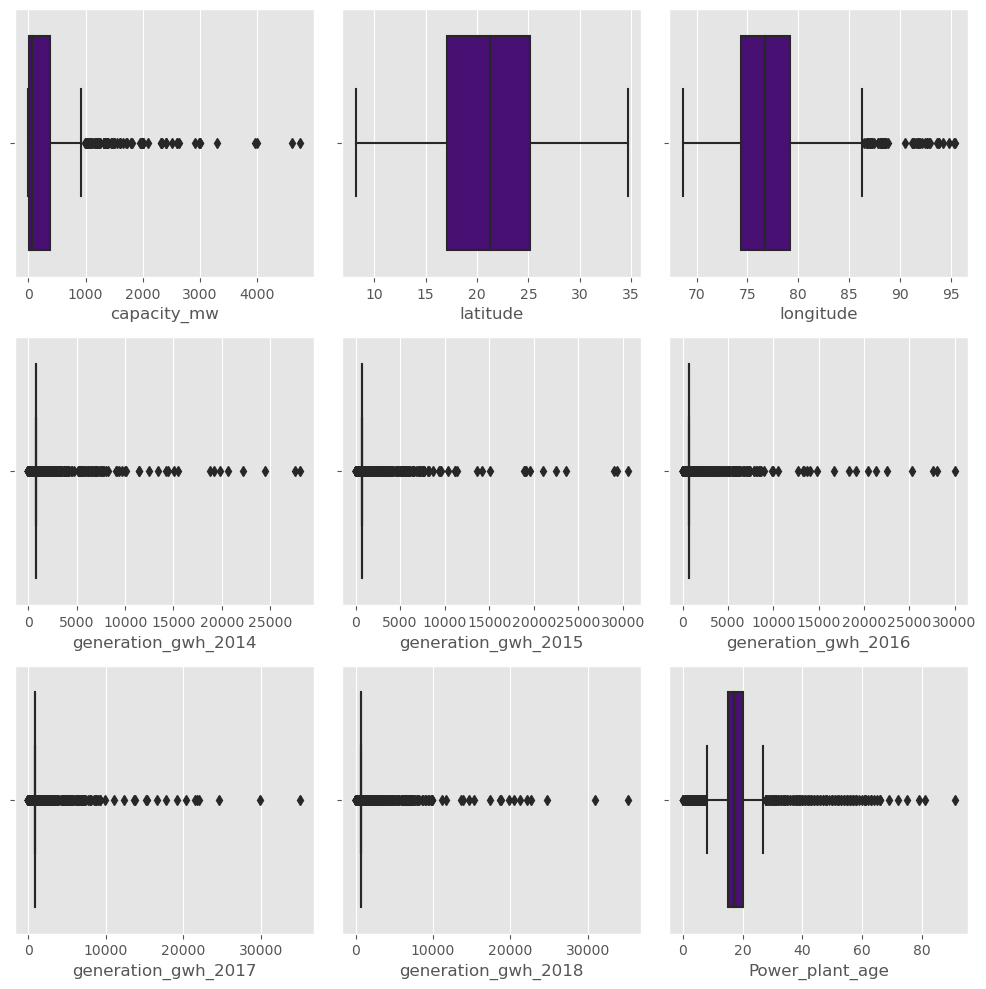

In [82]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

In [83]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [84]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','Power_plant_age']]

In [85]:
z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [86]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [87]:
df.shape

(907, 13)

In [88]:
new_df.shape

(851, 13)

In [89]:
print("total_dropped_rows",df.shape[0] - new_df.shape[0])

total_dropped_rows 56


### Percentage data loss:

In [90]:
loss_percent=(907-851)/907*100
print(loss_percent,'%')

6.174200661521499 %


checking the data loss percentage by comparing the rows in our original data set and the new data set after removal of the outliers. usually less than 10% data loss is acceptable

#### df_new is the new data set after all the unnecessary columns and all the outliers apart from target columns (with z<3 z score) are removed

## Correlation between the target variable and features

In [91]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

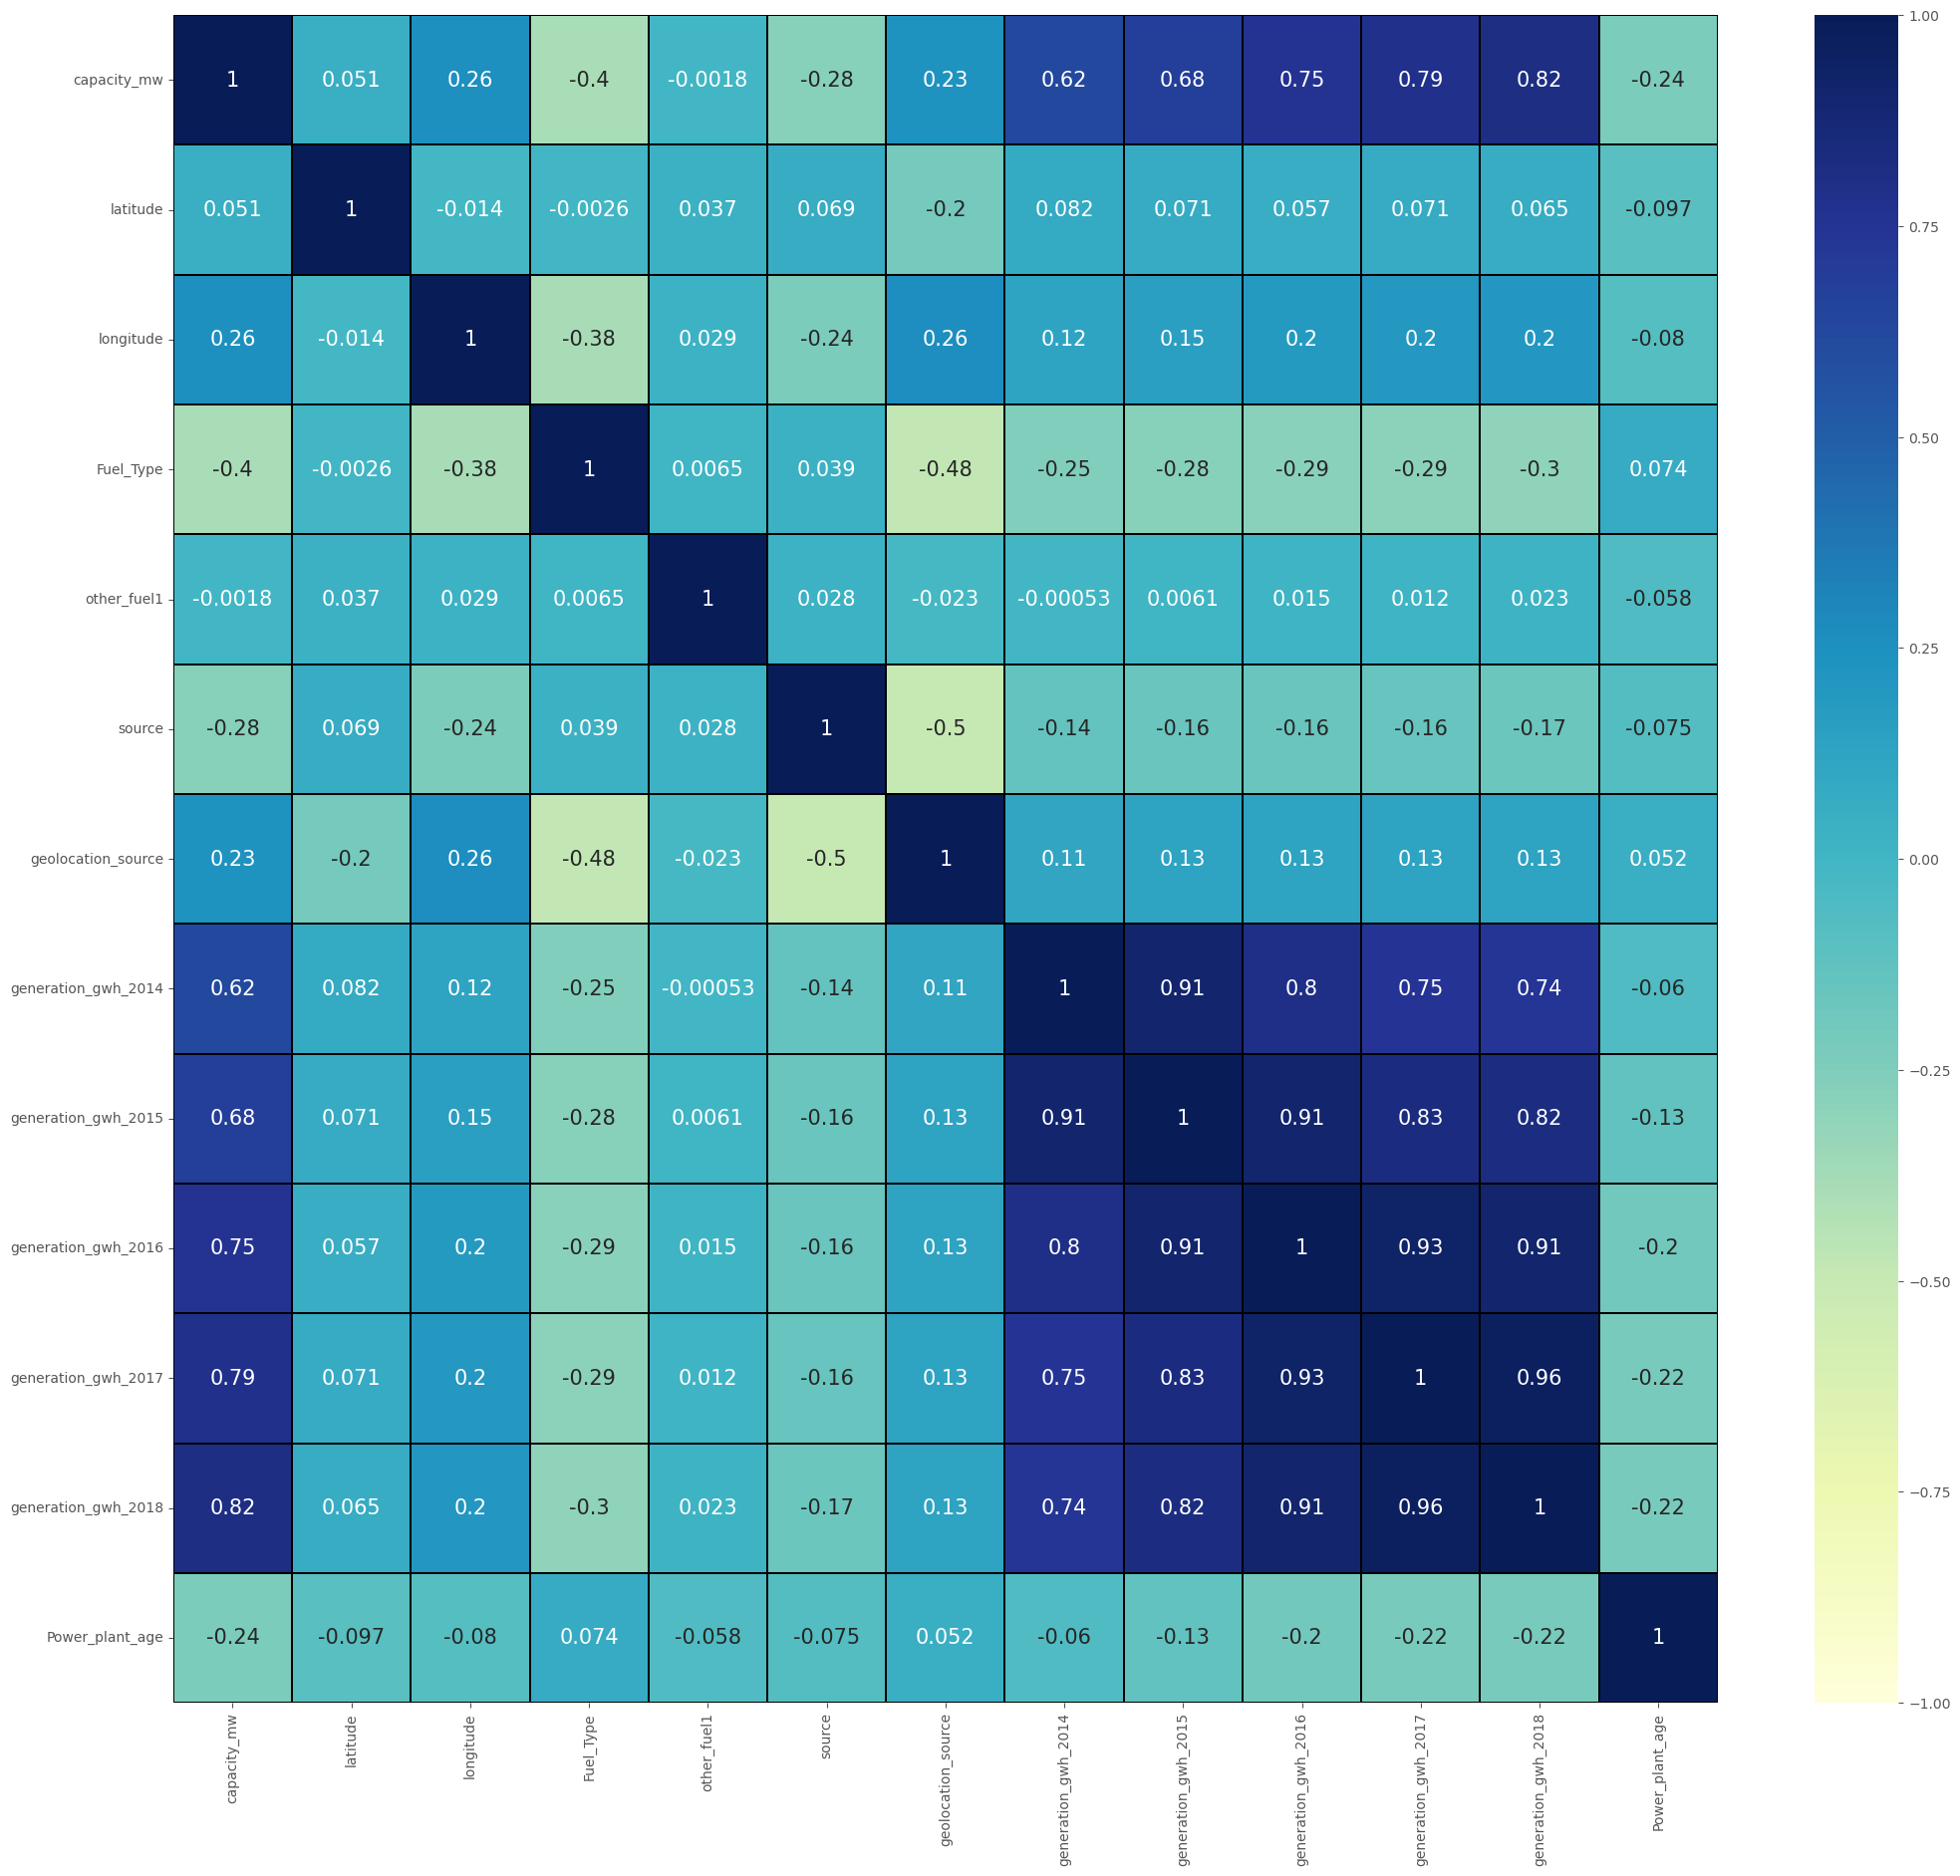

In [92]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [93]:
new_df.corr()['Fuel_Type'].sort_values()

geolocation_source    -0.478601
capacity_mw           -0.398039
longitude             -0.382975
generation_gwh_2018   -0.298364
generation_gwh_2017   -0.289232
generation_gwh_2016   -0.286624
generation_gwh_2015   -0.276308
generation_gwh_2014   -0.250101
latitude              -0.002561
other_fuel1            0.006463
source                 0.038558
Power_plant_age        0.074358
Fuel_Type              1.000000
Name: Fuel_Type, dtype: float64

In [94]:
new_df.corr()['capacity_mw'].sort_values()

Fuel_Type             -0.398039
source                -0.275724
Power_plant_age       -0.241487
other_fuel1           -0.001758
latitude               0.050588
geolocation_source     0.234543
longitude              0.257582
generation_gwh_2014    0.620202
generation_gwh_2015    0.680949
generation_gwh_2016    0.750088
generation_gwh_2017    0.788972
generation_gwh_2018    0.815198
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

Here we can see the co-relation between all the features and the features and targets

The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

The label Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Hence after checking VIF we can think about dropping these 2 columns.

## Visualizing the correlation between label and features using bar plot

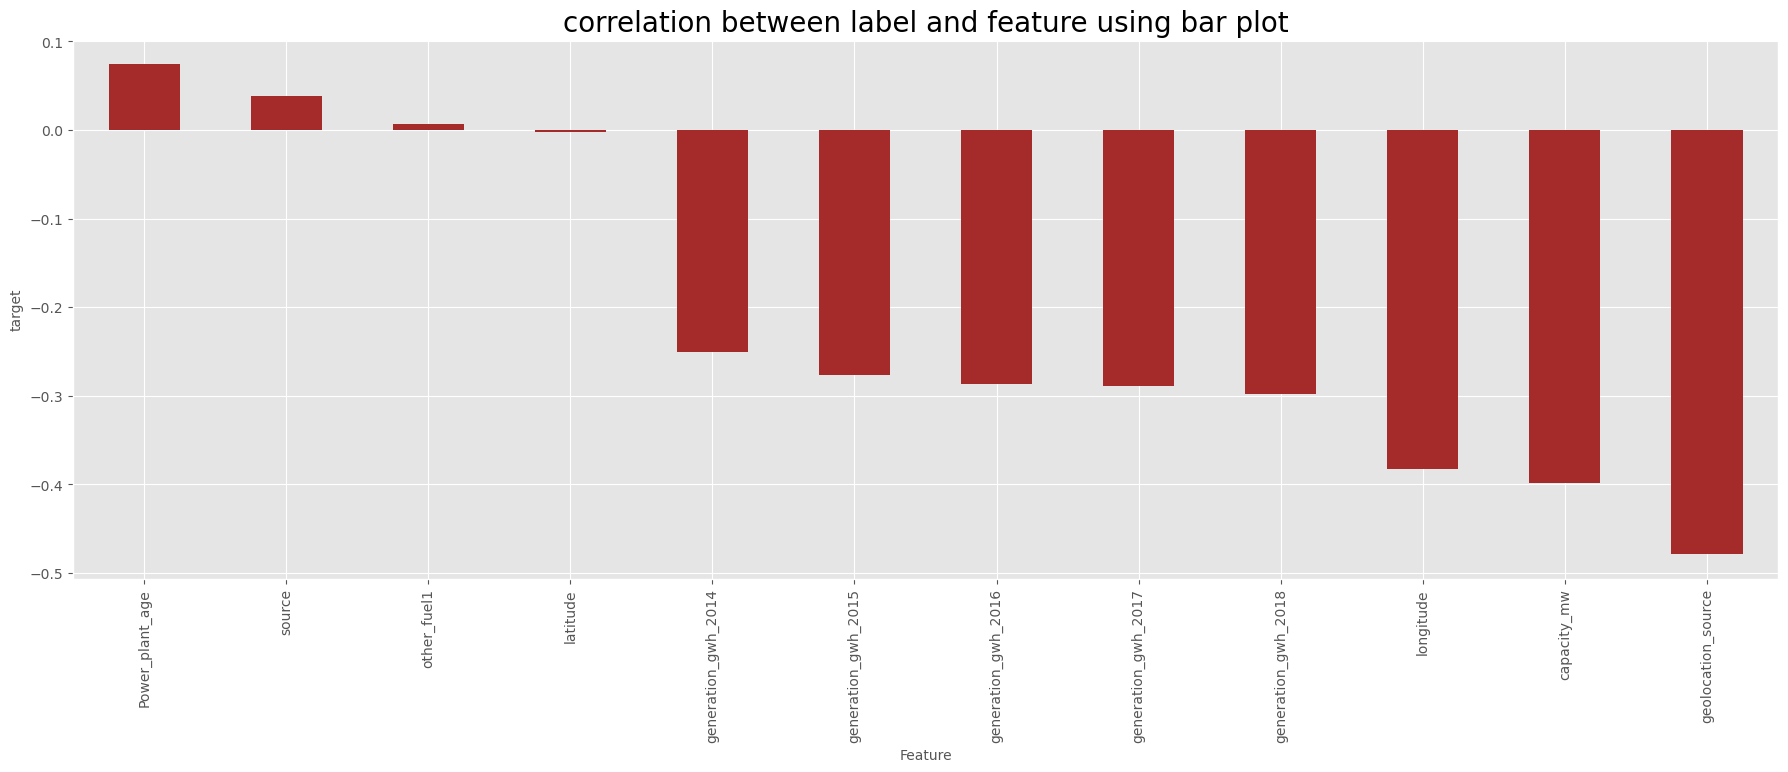

In [96]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='brown')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

## MultiCollinearity with Variance Inflation Factor

In [97]:
df1=pd.DataFrame(data=new_df)       # copying the dataframe
df1

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [98]:
x1=df1.iloc[:,1:]
y1=df1.iloc[:,0]

In [99]:
x1

,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [100]:
y1

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 851, dtype: float64

In [101]:
x1.shape

(851, 12)

In [102]:
y1.shape

(851,)

In [103]:
x1.shape[1]    # 12 number of columns

12

In [104]:
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [106]:
calc_vif(x1)

,variables,VIF FACTOR
0,latitude,13.872461
1,longitude,244.574821
2,Fuel_Type,4.644438
3,other_fuel1,279.902398
4,source,2.932705
5,geolocation_source,13.596524
6,generation_gwh_2014,10.519302
7,generation_gwh_2015,20.375290
8,generation_gwh_2016,22.939038
9,generation_gwh_2017,30.883761


other_fuel1 has the highest VIF FACTOR hence lets drop it first

In [108]:
x1=df1.drop(['other_fuel1'],axis=1)

In [109]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,4.925265
1,latitude,13.421012
2,longitude,47.409391
3,Fuel_Type,4.210582
4,source,2.833991
5,geolocation_source,12.954951
6,generation_gwh_2014,10.551644
7,generation_gwh_2015,20.382745
8,generation_gwh_2016,22.935981
9,generation_gwh_2017,30.879133


Since latitude has the lowest contribution compared to both the targets lets drop that first and see what happens

In [110]:
x1=df1.drop(['other_fuel1','latitude'],axis=1)

In [111]:
calc_vif(x1)

,variables,VIF FACTOR
0,capacity_mw,4.924663
1,longitude,31.060239
2,Fuel_Type,4.210062
3,source,2.832397
4,geolocation_source,12.580994
5,generation_gwh_2014,10.525915
6,generation_gwh_2015,20.377171
7,generation_gwh_2016,22.860138
8,generation_gwh_2017,30.817585
9,generation_gwh_2018,25.665932


We can see VIF has decreased drastically cause of removing of these 2 columns. Hence lets drop these 2 columns next

## Feature selection by dropping columns

In [112]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [113]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


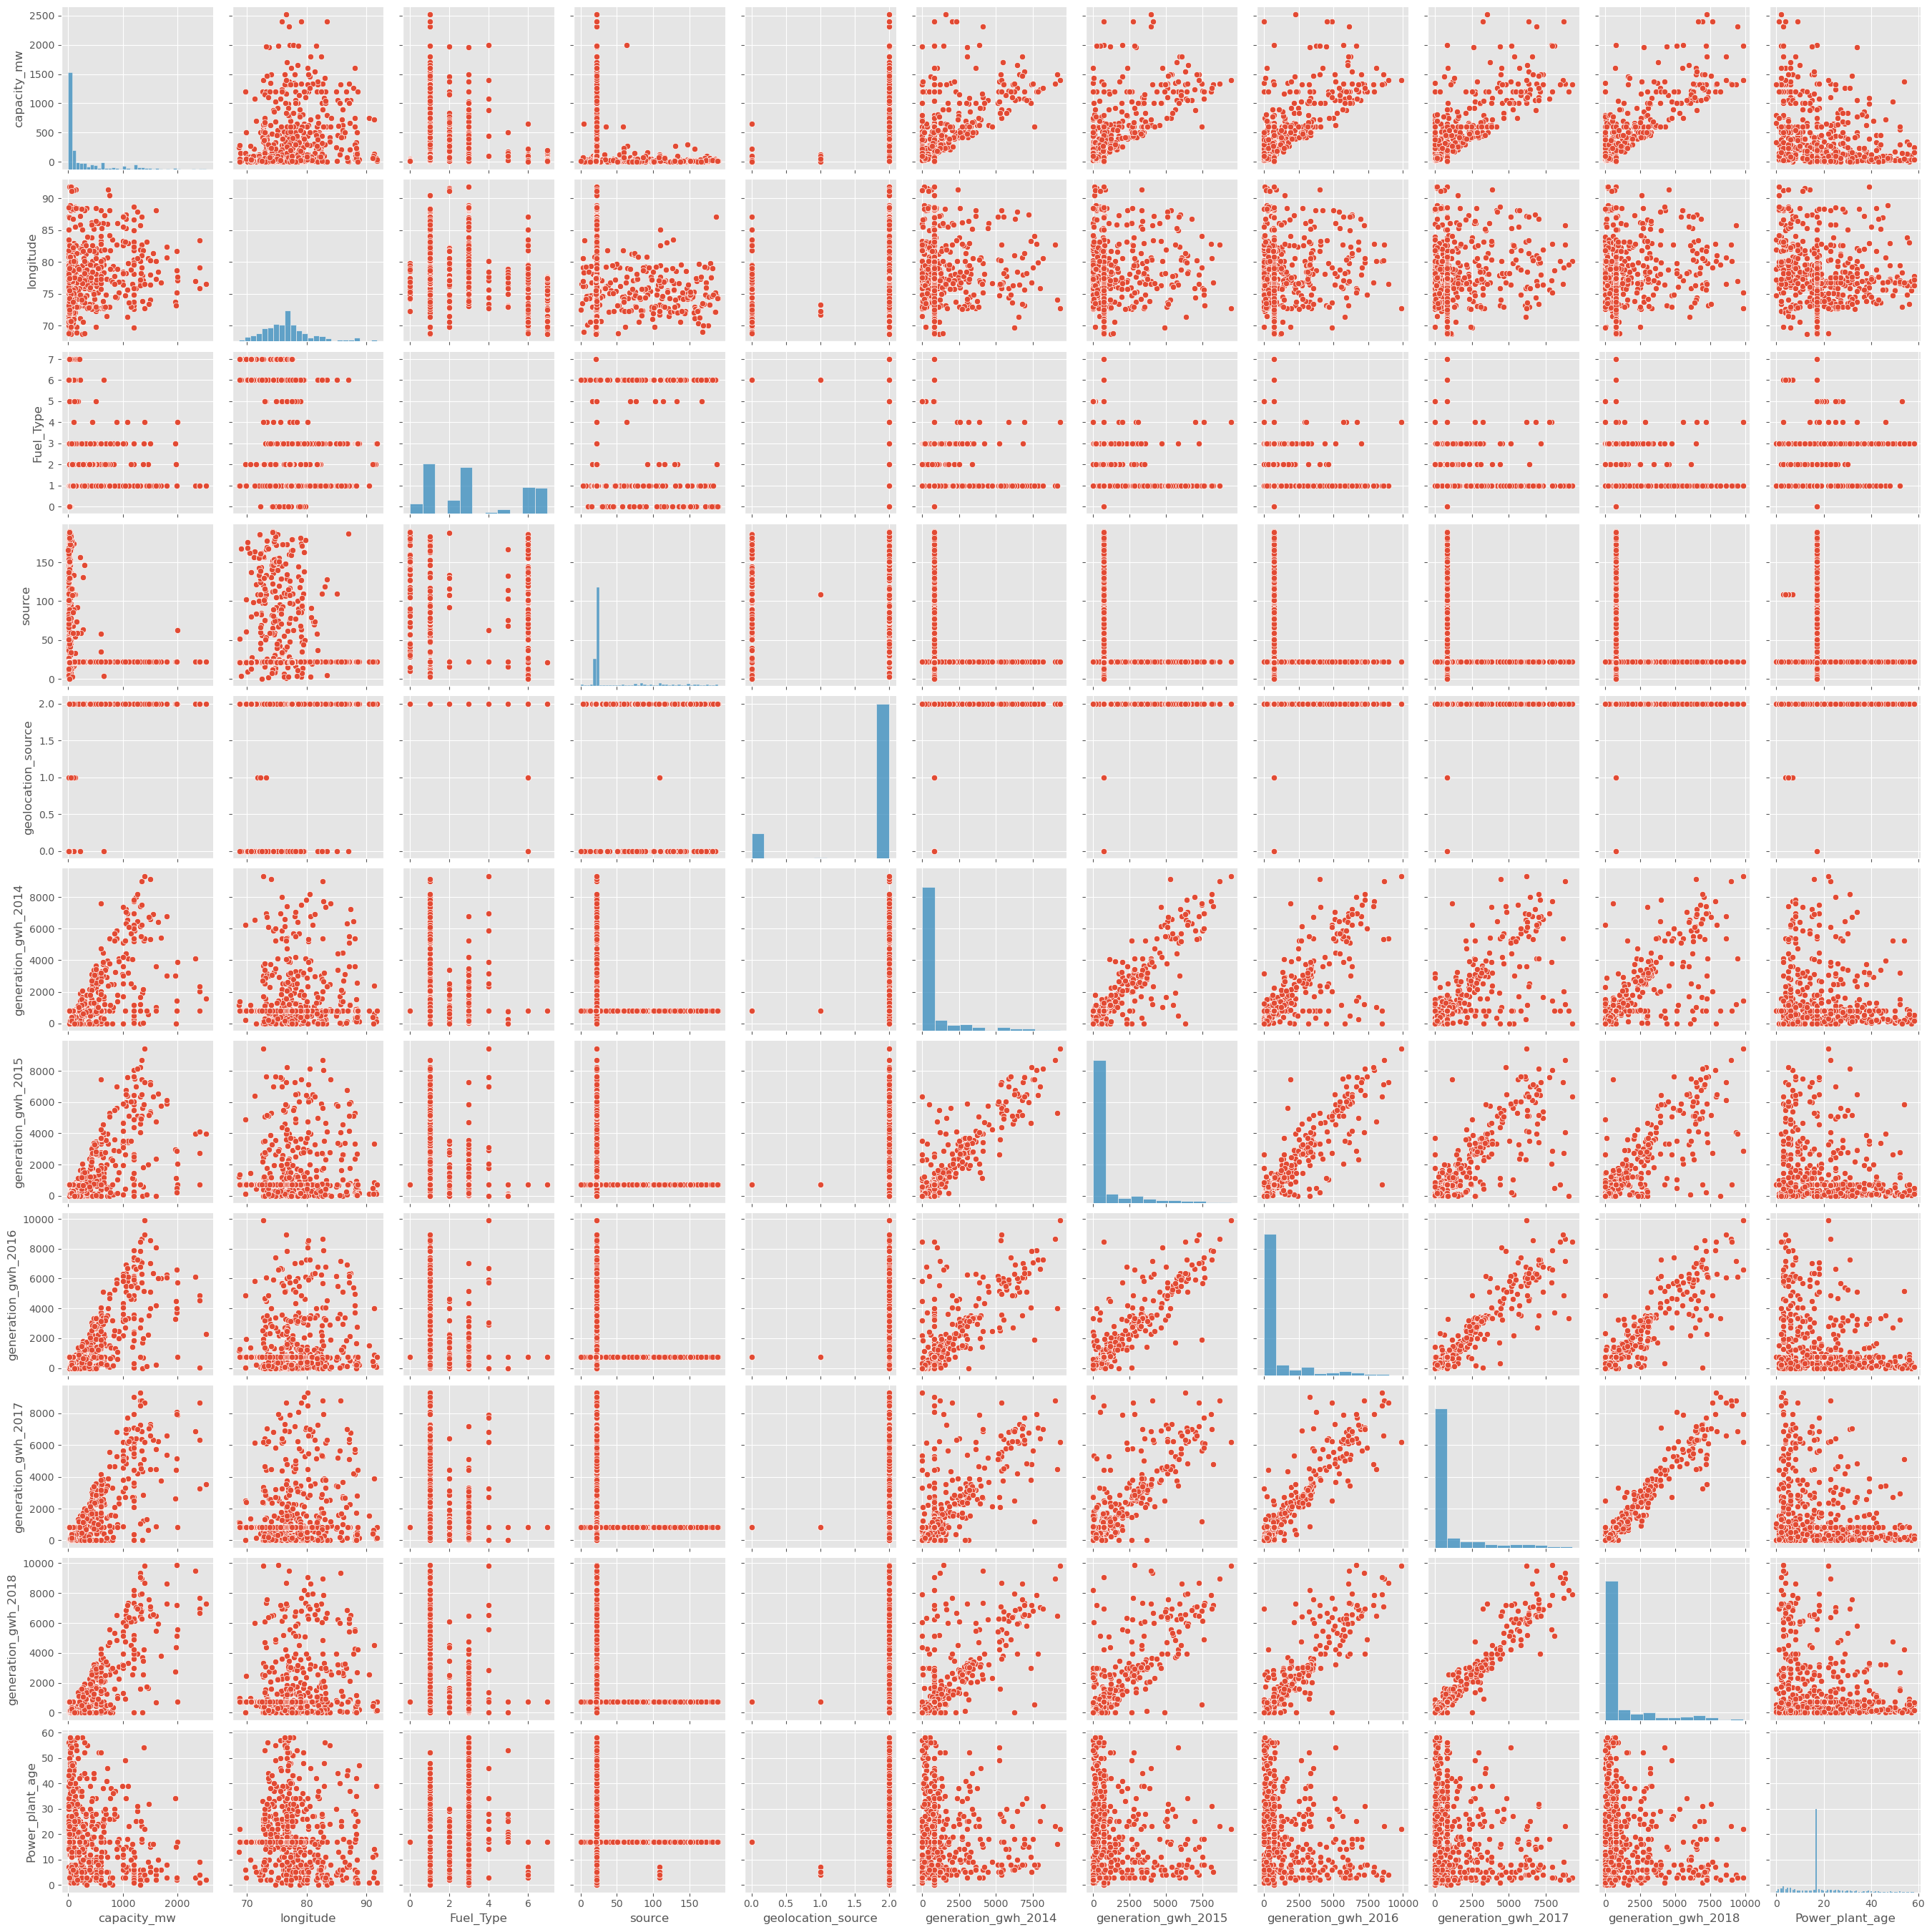

In [114]:
sns.pairplot(new_df)

We can see the relation between all the features and target variable using pairplot.

# Machine Learning

## 1.Predicting "Capacity_mw" Target

### Splitting the dataset into Features and Target

In [115]:
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [116]:
x.shape

(851, 10)

In [117]:
y.shape

(851,)

In [118]:
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...
902,77.3568,1,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,78.1654,6,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,75.5811,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,73.7477,1,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [119]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 851, dtype: float64

### Checking for skewness

In [120]:
x.skew().sort_values()

geolocation_source    -2.066536
Fuel_Type              0.413759
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

longitude generation_gwh_2013 generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 Power_plant_age

### Removing skewness using yeo-johnson method

In [121]:
from sklearn.preprocessing import PowerTransformer
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
transf = PowerTransformer(method='yeo-johnson')

In [122]:
x[skew] = transf.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [123]:
x.skew()

longitude             -0.000128
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

Since Fuel_Type, source and geolocation_source were categorically encoded values we didnt use transformation for skewness removal.

Rest of the numerical data columns the skewness has been removed.

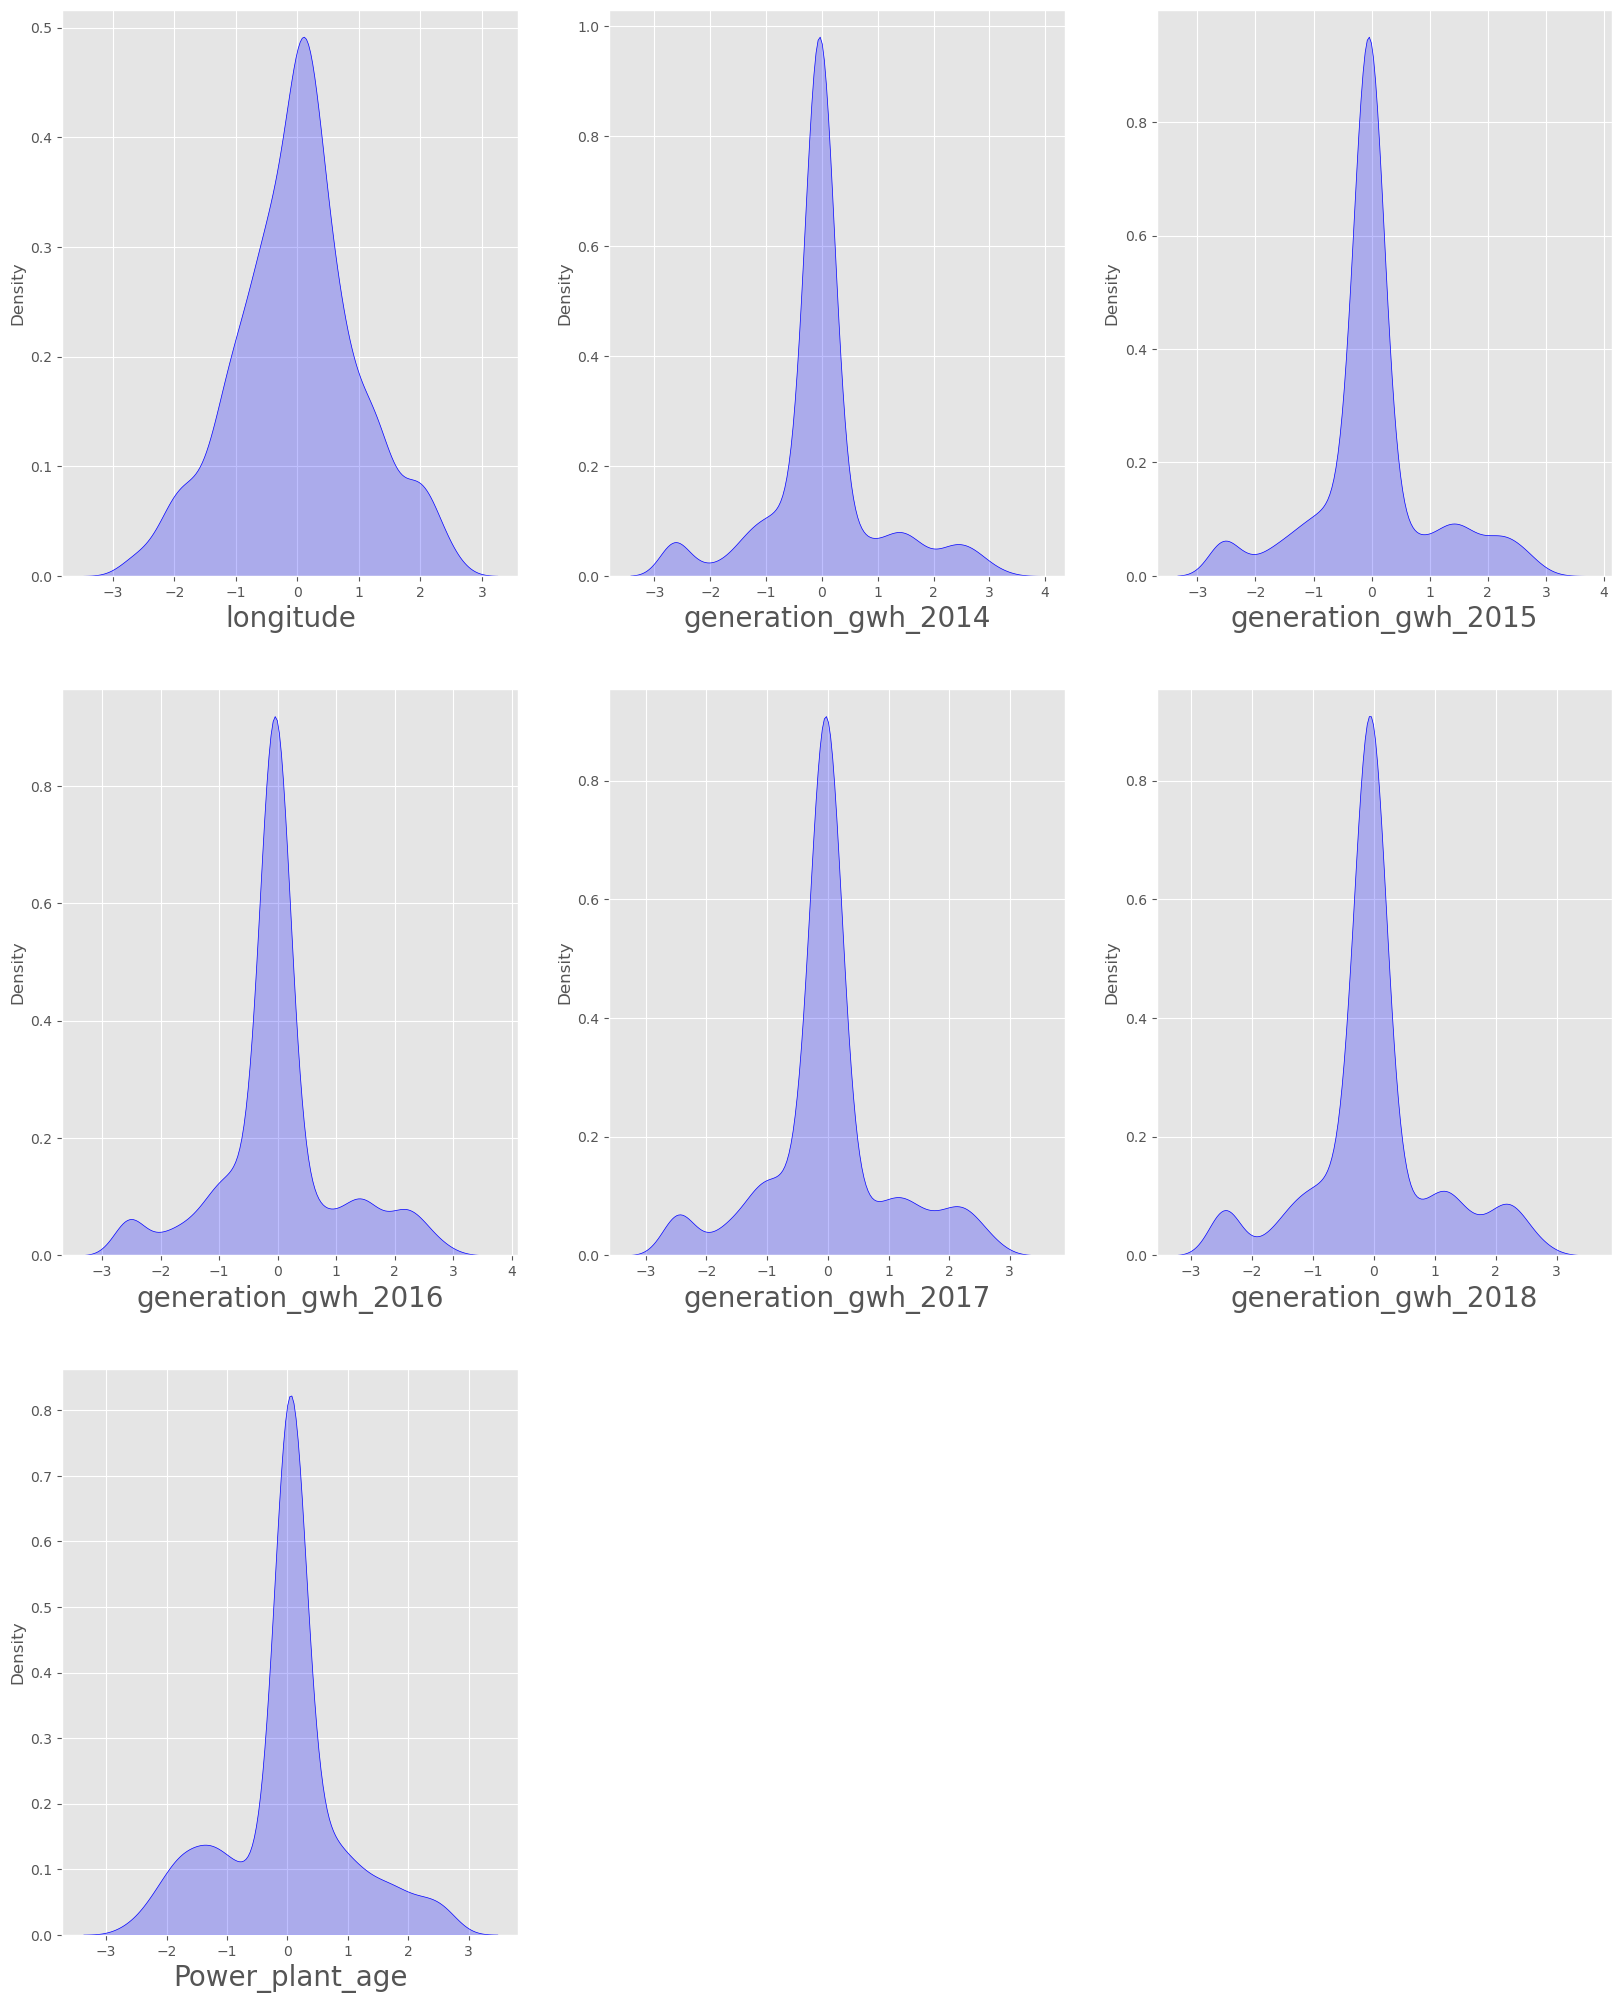

In [124]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normal now

## Feature Scalling

In [125]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


The dataset x has now been scaled.

### MultiCollinearity with Variance Inflation Factor

In [126]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.309948,longitude
1,1.682645,Fuel_Type
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


VIF values in all the columns are less then 10, hence no multicolinearity problem exists.

### Finding best random state

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [128]:
#getting the best random state for .20 test size
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.20,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8821003073156323 Random_State 111


In [129]:
#getting the best random state for .30 test size
maxAccu=0
maxRS=0
for i in range(1,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8623798686307098 Random_State 185


We got best r2 score of 0.878 at a random state of 125 for test_size=.20

### Train_test_Split

In [130]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=125)

In [131]:
# importing all the required libraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [132]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=125)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

### Linear Regression

In [133]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 245.2176403143082
R2 Score is: 60.50085415827557
Cross Validation Score is: 54.40434259567007
R2 Score - Cross Validation Score is 6.0965115626054995


### L1 -- Lasso Regression

In [134]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 245.21635902893112
R2 Score is: 60.50126693074731
Cross Validation Score is: 54.40459227008451
R2 Score - Cross Validation Score is 6.096674660662806


### L2 -- Ridge Regression

In [135]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 245.21742268211673
R2 Score is: 60.50092426972306
Cross Validation Score is: 54.40437885767844
R2 Score - Cross Validation Score is 6.09654541204462


### Elastic Net

In [136]:
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 245.14355271630322
R2 Score is: 60.52471830409165
Cross Validation Score is: 54.41670015581644
R2 Score - Cross Validation Score is 6.108018148275207


### Support Vector Regression

In [137]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 404.7742028213369
R2 Score is: -7.624200572733364
Cross Validation Score is: -11.39657492770902
R2 Score - Cross Validation Score is 3.772374354975656


In [138]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 313.2288103301929
R2 Score is: 35.55226062438119
Cross Validation Score is: 26.42896802921331
R2 Score - Cross Validation Score is 9.123292595167882


In [139]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 274.9566511710502
R2 Score is: 50.339310438897165
Cross Validation Score is: 43.403823512262655
R2 Score - Cross Validation Score is 6.9354869266345105


### Decision Tree Regressor

In [140]:
model=DecisionTreeRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 194.07161222939695
R2 Score is: 75.25950903732124
Cross Validation Score is: 58.76758704001117
R2 Score - Cross Validation Score is 16.491921997310065


In [141]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 200.02672197415717
R2 Score is: 73.71788435573552
Cross Validation Score is: 58.604221091121225
R2 Score - Cross Validation Score is 15.113663264614296


### Random Forest Regressor

In [142]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 140.91446492446485
R2 Score is: 86.95646109005683
Cross Validation Score is: 78.50711398413397
R2 Score - Cross Validation Score is 8.449347105922868


In [143]:
model=RandomForestRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 139.04391979729402
R2 Score is: 87.30045119928242
Cross Validation Score is: 78.16052670518994
R2 Score - Cross Validation Score is 9.139924494092483


### K Neighbors Regressor

In [144]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 162.60726630197928
R2 Score is: 82.63142518925956
Cross Validation Score is: 72.4607518724892
R2 Score - Cross Validation Score is 10.170673316770362


### SGD Regressor

In [145]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 243.53839377225387
R2 Score is: 61.03998090854397
Cross Validation Score is: 55.01298119835418
R2 Score - Cross Validation Score is 6.026999710189784


### Gradient Boosting Regressor

In [146]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 144.1713943371669
R2 Score is: 86.34654750250968
Cross Validation Score is: 74.947826180721
R2 Score - Cross Validation Score is 11.398721321788685


### Ada Boost Regressor

In [147]:
model=AdaBoostRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 245.82383804952505
R2 Score is: 60.30532263916826
Cross Validation Score is: 58.66999364833373
R2 Score - Cross Validation Score is 1.6353289908345303


In [148]:
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 266.9370618461963
R2 Score is: 53.19394505426494
Cross Validation Score is: 54.23641428289005
R2 Score - Cross Validation Score is -1.0424692286251158


### Extra Trees Regressor

In [149]:
model=ExtraTreesRegressor(random_state=125)
regressor(model, x, y)

Root Mean Square Error is: 137.4140603824718
R2 Score is: 87.59643201482244
Cross Validation Score is: 79.43962573802399
R2 Score - Cross Validation Score is 8.156806276798449


In [150]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 141.75815764510847
R2 Score is: 86.7998031770725
Cross Validation Score is: 79.2383482246187
R2 Score - Cross Validation Score is 7.561454952453801


Comparing all the above the Extra Trees Regressor gives the best results since the R2 Score - Cross Validation Score are closest along with higher Cross Validation Score and the highest R2 score comparing all the models.

# Hyper parameter tuning

In [151]:
#ExtraTreesRegressor?

In [152]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [153]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [154]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [155]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [156]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'squared_error', 'max_features': 'auto', 'n_jobs': 15}

We got the best parameters using Gridsearch CV

In [157]:
final_model = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'log2', n_jobs = 15)

In [158]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [159]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [160]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 89.26119268637451


In [161]:
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 79.20319843385442


In [162]:
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 127.86034790805401


We used Hyper Parameter Tuning on the final model to obtained the best r2_score and CV score.

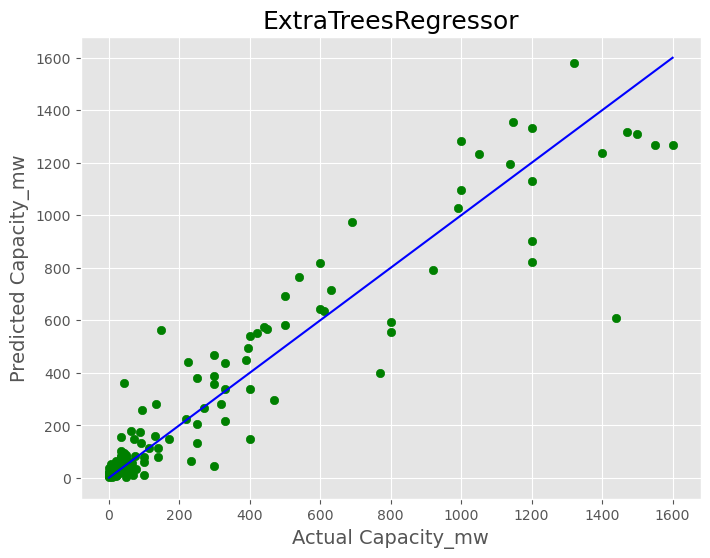

In [164]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='g')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Capacity_mw', fontsize=14)
plt.ylabel('Predicted Capacity_mw', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Plotting the Final model Actual Capacity_mw vs Predicted Capacity_mw

Hence after Hyper Parameter Tuning on the final model to obtained the best r2_score 89.249% and CV score 79.4% and lowest Root Mean Square Error is: 127.93.

## Saving the model in pickle Format

In [167]:
import pickle
filename = 'Global_Power_Plant_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

Saving the best regression model using pickle

## Prediction Conclusion:

In [168]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,1.00,9.2150
1,1440.00,607.7160
2,55.00,34.2810
3,10.50,11.6018
4,68.80,12.0603
...,...,...
166,1200.00,1334.3000
167,330.00,340.3719
168,10.00,12.3000
169,56.25,24.6773


Hence predicted the Capacity_mw using the x_test feature columns.

In [169]:
df_comparison.to_csv('Global_Power_Plant_Capacity_mw_Regression_Prediction.csv')

Saving the predicted values in a csv file

# 2. Predicting "Fuel_Type" Target

## Seperating the Dataset into Features and Label(Fuel_Type)

In [170]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [171]:
x_df.shape

(851, 10)

In [172]:
y_df.shape

(851,)

## Checking the Skewness of x_df

In [173]:
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
capacity_mw            2.170245
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

We can see that there are skewness in most of the columns

## Removing the skewness

In [174]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
transfo = PowerTransformer(method='yeo-johnson')

transforming all the numerical columns apart from categorically encoded columns

In [175]:
x_df[skew] = transfo.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [176]:
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude             -0.000128
capacity_mw            0.016303
Power_plant_age        0.043734
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
generation_gwh_2016    0.147035
generation_gwh_2015    0.163587
generation_gwh_2014    0.232399
source                 1.734252
dtype: float64

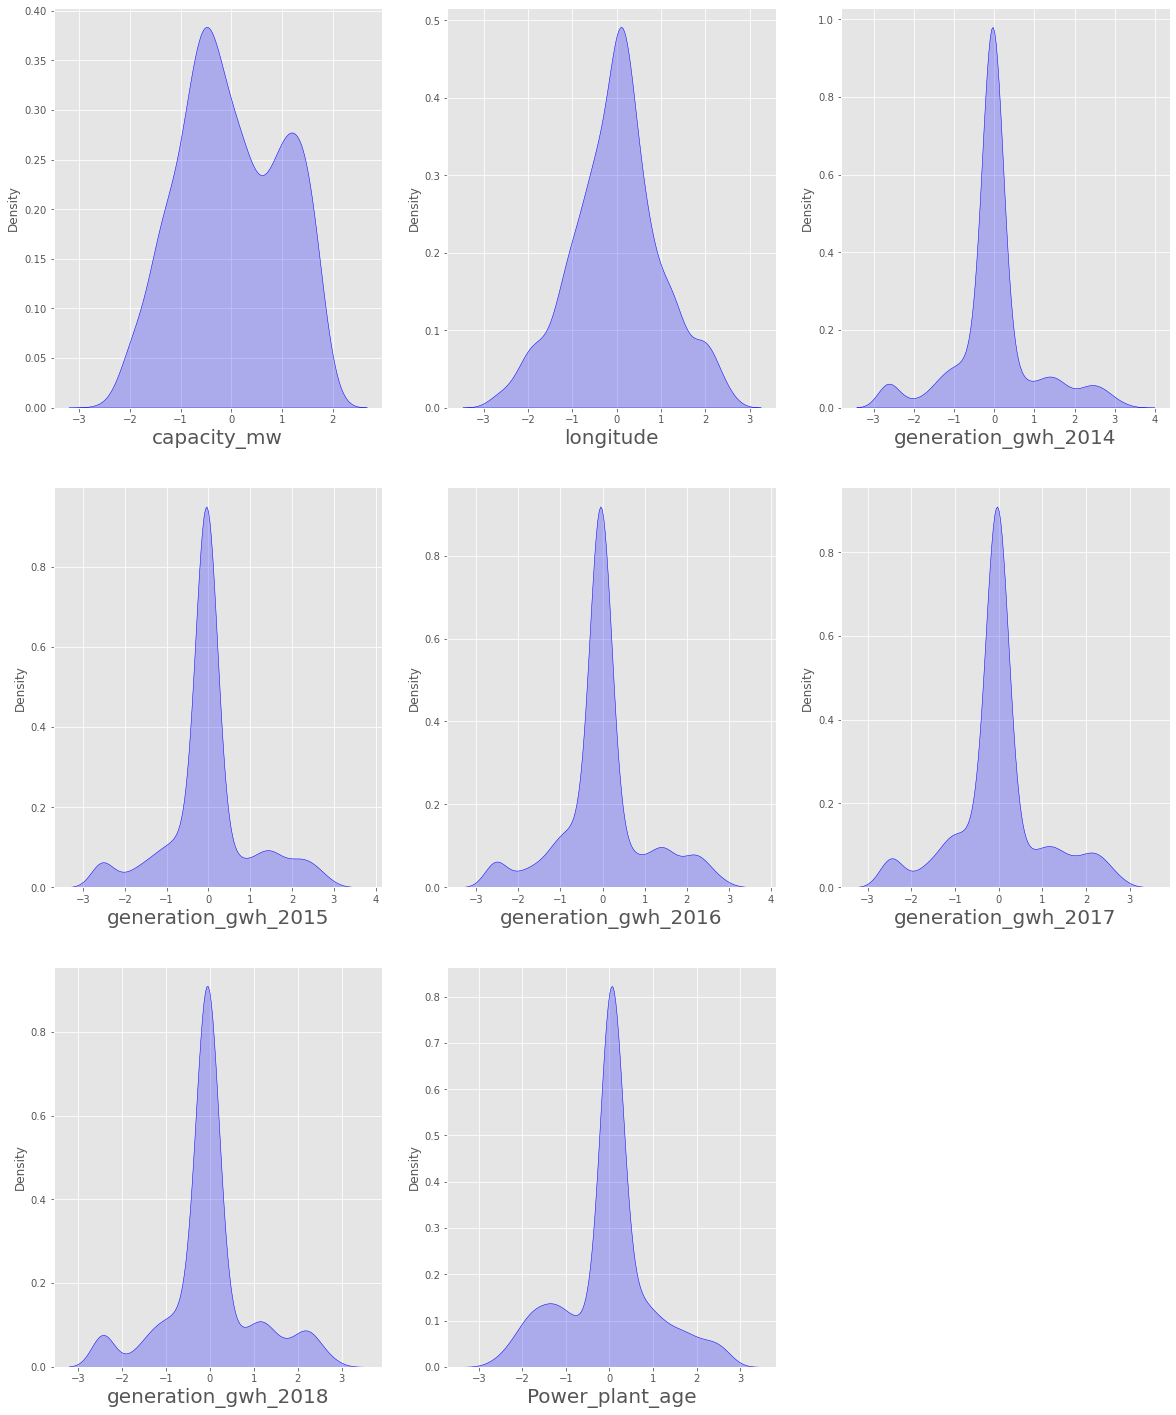

In [181]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The dataset looks normally distributed now

## Feature Scaling

In [182]:
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


We have scaled the dataset.

## Checking Multicolinearity

In [183]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


All the columns has vif values less then 10, hence there is no multicolinearity that exist.

In [184]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

We can see that the target Fuel_Type has multiple classes in the mode of energy source, hence we can see that this is a multi classification problem. As the data between the classes are not balanced with 1 having 238 counts and 4 having only 9 counts, we have to do SMOTE oversampling of the data.

## SMOTE OverSampling

In [185]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [186]:
y_df.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: Fuel_Type, dtype: int64

Here we can see that the data imbalance has been removed.

In [206]:
X = x_df   # renaming the features variable

In [207]:
X

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
1899,-0.403015,-1.810411,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
1900,-0.289259,-2.425787,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
1901,-1.878258,0.229776,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
1902,-0.638451,-0.734827,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [208]:
Y = y_df   # renaming the target variable

In [209]:
Y

0       6
1       1
2       7
3       2
4       1
       ..
1899    7
1900    7
1901    7
1902    7
1903    7
Name: Fuel_Type, Length: 1904, dtype: int32

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

## Getting the best random state

In [211]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.952755905511811  on Random_state  142


Hence we get best accuracy score as 0.952 at Random_state  142 in RandomForestClassifier

## train_test_split

In [212]:
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=142)

In [219]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [214]:
# creating a function to run all the classifiers

def classifier(model, X, Y):
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=142) 
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

### Logistic Regression

In [217]:
model = LogisticRegression()
classifier(model, X, Y)

Accuracy Score: 73.75328083989501

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        49
           1       0.46      0.32      0.38        37
           2       0.58      0.43      0.49        42
           3       0.56      0.49      0.52        47
           4       0.68      0.87      0.76        39
           5       0.81      0.86      0.83        50
           6       1.00      0.98      0.99        63
           7       0.71      0.89      0.79        54

    accuracy                           0.74       381
   macro avg       0.70      0.71      0.70       381
weighted avg       0.72      0.74      0.73       381

Cross Validation Score: 72.68821660450338

Accuracy Score - Cross Validation Score is 1.065064235391631


### Naive Bayes

In [220]:
model = GaussianNB()
classifier(model, X, Y)

Accuracy Score: 63.77952755905512

Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74        49
           1       0.60      0.08      0.14        37
           2       0.20      0.02      0.04        42
           3       0.33      0.77      0.46        47
           4       0.71      0.56      0.63        39
           5       0.94      0.30      0.45        50
           6       0.82      1.00      0.90        63
           7       1.00      1.00      1.00        54

    accuracy                           0.64       381
   macro avg       0.65      0.59      0.55       381
weighted avg       0.67      0.64      0.59       381

Cross Validation Score: 59.9780356402818

Accuracy Score - Cross Validation Score is 3.8014919187733156


### SVC Classifier

In [221]:
model = SVC(kernel='rbf')
classifier(model, X, Y)

Accuracy Score: 83.2020997375328

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        49
           1       0.77      0.46      0.58        37
           2       0.74      0.76      0.75        42
           3       0.91      0.64      0.75        47
           4       0.80      1.00      0.89        39
           5       0.92      0.88      0.90        50
           6       1.00      1.00      1.00        63
           7       0.72      0.96      0.83        54

    accuracy                           0.83       381
   macro avg       0.83      0.81      0.81       381
weighted avg       0.84      0.83      0.83       381

Cross Validation Score: 80.46152783533638

Accuracy Score - Cross Validation Score is 2.7405719021964217


In [222]:
model = SVC(kernel='linear')
classifier(model, X, Y)

Accuracy Score: 79.00262467191601

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        49
           1       0.54      0.41      0.46        37
           2       0.56      0.55      0.55        42
           3       0.64      0.60      0.62        47
           4       0.80      1.00      0.89        39
           5       0.98      0.80      0.88        50
           6       1.00      1.00      1.00        63
           7       0.83      0.91      0.87        54

    accuracy                           0.79       381
   macro avg       0.77      0.77      0.76       381
weighted avg       0.79      0.79      0.78       381

Cross Validation Score: 78.25652714463322

Accuracy Score - Cross Validation Score is 0.7460975272827852


In [223]:
model = SVC(kernel='poly')
classifier(model, X, Y)

Accuracy Score: 69.02887139107612

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63        49
           1       0.94      0.46      0.62        37
           2       0.65      0.48      0.55        42
           3       0.88      0.49      0.63        47
           4       0.94      0.87      0.91        39
           5       0.97      0.58      0.72        50
           6       1.00      0.94      0.97        63
           7       0.38      1.00      0.55        54

    accuracy                           0.69       381
   macro avg       0.81      0.67      0.70       381
weighted avg       0.81      0.69      0.70       381

Cross Validation Score: 65.70272137035502

Accuracy Score - Cross Validation Score is 3.3261500207211014


### Decision Tree Classifier

In [224]:
model = DecisionTreeClassifier()
classifier(model, X, Y)

Accuracy Score: 91.33858267716536

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.64      0.68      0.66        37
           2       0.82      0.88      0.85        42
           3       0.95      0.83      0.89        47
           4       0.88      0.92      0.90        39
           5       0.96      0.92      0.94        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.91       381
   macro avg       0.90      0.90      0.90       381
weighted avg       0.92      0.91      0.91       381

Cross Validation Score: 87.13095731454621

Accuracy Score - Cross Validation Score is 4.207625362619154


### KNeighbors Classifier

In [225]:
model = KNeighborsClassifier()
classifier(model, X, Y)

Accuracy Score: 87.4015748031496

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        49
           1       0.73      0.43      0.54        37
           2       0.71      0.95      0.82        42
           3       0.94      0.62      0.74        47
           4       0.86      0.97      0.92        39
           5       0.94      0.90      0.92        50
           6       1.00      1.00      1.00        63
           7       0.92      1.00      0.96        54

    accuracy                           0.87       381
   macro avg       0.87      0.86      0.85       381
weighted avg       0.88      0.87      0.86       381

Cross Validation Score: 85.39908827186075

Accuracy Score - Cross Validation Score is 2.0024865312888522


### SGD Classifier

In [226]:
model = SGDClassifier()
classifier(model, X, Y)

Accuracy Score: 59.580052493438316

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.55      0.58        49
           1       0.62      0.27      0.38        37
           2       0.37      0.38      0.38        42
           3       0.36      0.66      0.46        47
           4       0.54      0.38      0.45        39
           5       0.52      0.44      0.48        50
           6       1.00      0.98      0.99        63
           7       0.75      0.81      0.78        54

    accuracy                           0.60       381
   macro avg       0.60      0.56      0.56       381
weighted avg       0.62      0.60      0.59       381

Cross Validation Score: 61.818068794032335

Accuracy Score - Cross Validation Score is -2.238016300594019


### Random Forest Classifier

In [231]:
model = RandomForestClassifier(random_state=142)
classifier(model, X, Y)

Accuracy Score: 95.01312335958005

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.90      0.73      0.81        37
           2       0.93      0.98      0.95        42
           3       0.91      0.89      0.90        47
           4       0.93      0.97      0.95        39
           5       0.92      0.96      0.94        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.95       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.95      0.95      0.95       381

Cross Validation Score: 91.59649122807018

Accuracy Score - Cross Validation Score is 3.4166321315098713


In [232]:
model = RandomForestClassifier()
classifier(model, X, Y)

Accuracy Score: 95.01312335958005

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.83      0.81      0.82        37
           2       0.91      0.93      0.92        42
           3       0.93      0.85      0.89        47
           4       0.97      1.00      0.99        39
           5       0.94      0.96      0.95        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.95       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.95      0.95      0.95       381

Cross Validation Score: 91.5445503522586

Accuracy Score - Cross Validation Score is 3.468573007321453


### ExtraTrees Classifier

In [228]:
model = ExtraTreesClassifier()
classifier(model, X, Y)

Accuracy Score: 94.22572178477691

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        49
           1       0.87      0.70      0.78        37
           2       0.91      0.95      0.93        42
           3       0.91      0.87      0.89        47
           4       0.95      1.00      0.97        39
           5       0.94      0.96      0.95        50
           6       1.00      1.00      1.00        63
           7       0.98      1.00      0.99        54

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.93       381
weighted avg       0.94      0.94      0.94       381

Cross Validation Score: 92.01657687525902

Accuracy Score - Cross Validation Score is 2.2091449095178888


### AdaBoost Classifier

In [229]:
model = AdaBoostClassifier()
classifier(model, X, Y)

Accuracy Score: 29.133858267716533

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.17      0.38      0.23        37
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        47
           4       0.16      0.95      0.27        39
           5       0.00      0.00      0.00        50
           6       1.00      0.95      0.98        63
           7       0.00      0.00      0.00        54

    accuracy                           0.29       381
   macro avg       0.17      0.28      0.18       381
weighted avg       0.20      0.29      0.21       381

Cross Validation Score: 27.888796795137445

Accuracy Score - Cross Validation Score is 1.2450614725790885


### Gradient Boosting Classifier

In [230]:
model = GradientBoostingClassifier()
classifier(model, X, Y)

Accuracy Score: 92.91338582677166

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        49
           1       0.79      0.73      0.76        37
           2       0.88      0.90      0.89        42
           3       0.91      0.83      0.87        47
           4       0.90      0.95      0.92        39
           5       0.92      0.96      0.94        50
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        54

    accuracy                           0.93       381
   macro avg       0.92      0.92      0.92       381
weighted avg       0.93      0.93      0.93       381

Cross Validation Score: 90.23083298798177

Accuracy Score - Cross Validation Score is 2.6825528387898885


Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

# Hyper Parameter Tuning

In [233]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=142)

In [ ]:
#ExtraTreesClassifier?

In [234]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [5, 10, 15]}

In [235]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [236]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_jobs': [5, 10, 15]})

In [237]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'gini', 'max_features': 'log2', 'n_jobs': 5}

We got the best parameters using Gridsearch CV

In [238]:
final_modelc = ExtraTreesClassifier(criterion = 'gini', max_features = 'log2', n_jobs = 5)   # final model with best parameters

In [239]:
final_fitc = final_modelc.fit(x_train,y_train)   # final fit

In [240]:
final_predc = final_modelc.predict(x_test)   # predicting with best parameters

In [241]:
best_acc_score = (accuracy_score(y_test, final_predc))*100    # checking accuracy score
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  94.48818897637796


We successfully performed the Hyper Parameter Tuning on the Final Model.

In [242]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, X, Y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 92.12211631440807


We got final accuracy score of 94.488% and Cross Validation Score of 92.12% which is good

In [243]:
x_test.shape

(381, 10)

In [244]:
y_test.shape

(381,)

In [245]:
x_train.shape

(1523, 10)

In [246]:
y_train.shape

(1523,)

In [247]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        49
           1       0.86      0.65      0.74        37
           2       0.91      0.98      0.94        42
           3       0.90      0.91      0.91        47
           4       0.95      1.00      0.97        39
           5       0.94      0.96      0.95        50
           6       1.00      1.00      1.00        63
           7       0.98      1.00      0.99        54

    accuracy                           0.94       381
   macro avg       0.94      0.93      0.93       381
weighted avg       0.94      0.94      0.94       381



In [249]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

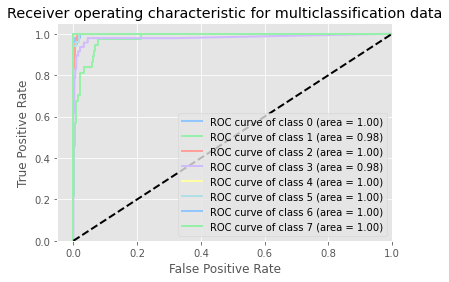

In [253]:
classifier = OneVsRestClassifier(final_modelc)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

Hence we got AUC ROC curve for all 8 classes which is either 0.98 or 1 which is good

# Saving the model in pickle Format

In [254]:
# pickeling or serialization of a file
import pickle
filenamec = 'Global_Power_Plant_Fuel_Type_Classification_final_model.pkl'
pickle.dump(final_modelc, open(filenamec, 'wb'))

# Prediction Conclusion:

In [255]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,5,5
2,5,5
3,2,2
4,7,7
...,...,...
376,6,6
377,7,7
378,0,0
379,4,4


Hence predicted the 'Fuel_Type' using the x_test feature columns.

In [256]:
df_comparisonc.to_csv('Global_Power_Plant_Fuel_Type_Classification_Prediction.csv')

Saving the predicted values in a csv file